# GDP Analysis of All Indian States

## Background - NITI Aayog <br>
NITI Aayog (National Institution for Transforming India) is a policy think tank of the Government of India which provides strategic inputs to the central and the state governments to achieve various development goals. In the past, NITI Aayog has played an important role in initiatives such as Digital India, Atal Innovation Mission, various agricultural reforms etc. and have designed various policies in education, skill development, water management, healthcare, etc. <br>

NITI Aayog was established to replace the Planning Commission of India which used to follow a top-down model for policy making, i.e. it typically designed policies at the central level (such as the various 5-year plans). On the other hand, NITI Aayog designs policies specific to the different states or segments of the economy. <br>


Finance Minister Arun Jaitley made the following observation on the necessity of creating NITI Aayog, "The 65-year-old Planning Commission had become a redundant organisation. It was relevant in a command economy structure, but not any longer. India is a diversified country and its states are in various phases of economic development along with their own strengths and weaknesses. In this context, a ‘one size fits all’ approach to economic planning is obsolete..." <br>

## Project Brief
You are working as the chief data scientist at NITI Aayog, reporting to the CEO. The CEO has initiated a project wherein the NITI Aayog will provide top-level recommendations to the Chief Ministers (CMs) of various states which will help them prioritise areas of development for their respective states. Since different states are in different phases of development, the recommendations should be specific to states as well.
<br>
The overall goal of this project is to help the CMs focus on areas which will foster economic development for their respective states. Since the most common measure of economic development is the GDP, you will analyse the GDP of the various states of India and suggest ways to improve it.
<br>

## Understanding GDP
Gross domestic product (GDP) at current prices is the GDP at the market value of goods and services produced in a country during a year. In other words, GDP measures the 'monetary value of final goods and services produced by a country/state in a given period of time'.
<br>
GDP can be broadly divided into goods and services produced by three sectors: the primary sector (agriculture), the secondary sector (industry), and the tertiary sector (services).
<br>
It is also known as nominal GDP. More technically, (real) GDP takes into account the price change that may have occurred due to inflation. This means that the real GDP is nominal GDP adjusted for inflation. We will use the nominal GDP for this exercise. Also, we will consider the financial year 2015-16 as the base year since most of the data required for this exercise is available for the above period.
<br>

## Per Capita GDP and Income
Total GDP divided by the population gives the per capita GDP (which roughly measures the average value of goods and services produced per person). The per capita income is closely related to per capita GDP (though they are not the same). In general, the per capita income increases when per capita GDP increases and vice-versa. For instance, in the financial year 2015-16, the per capita income of India was Rs 93,293, whereas the per capita GDP of India was $1717 which roughly translates to Rs 1,11,605. 
<br>
India ranks 11th in the world in terms of total GDP though it lies at the 139th position in terms of per capita GDP.

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
#ignoring all the warnings
import warnings
warnings.filterwarnings('ignore')

# Part-I: GDP Analysis of Indian States


## Part I-A:

In [2]:
data_part1 = pd.read_csv('Data-1A.csv')

In [3]:
data_part1.head()

Items  Description Duration  Andhra Pradesh   \
0  GSDP - CURRENT PRICES (` in Crore)  2011-12         379402.0   
1  GSDP - CURRENT PRICES (` in Crore)  2012-13         411404.0   
2  GSDP - CURRENT PRICES (` in Crore)  2013-14         464272.0   
3  GSDP - CURRENT PRICES (` in Crore)  2014-15         526468.0   
4  GSDP - CURRENT PRICES (` in Crore)  2015-16         609934.0   

   Arunachal Pradesh     Assam     Bihar  Chhattisgarh      Goa   Gujarat  \
0            11063.0  143175.0  247144.0      158074.0  42367.0  615606.0   
1            12547.0  156864.0  282368.0      177511.0  38120.0  724495.0   
2            14602.0  177745.0  317101.0      206690.0  35921.0  807623.0   
3            16761.0  198098.0  373920.0      234982.0  40633.0  895027.0   
4            18784.0  224234.0  413503.0      260776.0  45002.0  994316.0   

    Haryana  ...  Telangana  Tripura  Uttar Pradesh  Uttarakhand  \
0  297539.0  ...   359433.0  19208.0       724049.0     115523.0   
1  347032.0  ...   401493.0  21663.0       822903.0     131835.0   
2  400662.0  ...   452186.0  25593.0       944146.0     149817.0   
3  437462.0  ...   511178.0  29667.0      1043371.0     161985.0   
4  485184.0  ...   575631.0      NaN      1153795.0     184091.0   

   West Bengal1  Andaman & Nicobar Islands  Chandigarh     Delhi  Puducherry  \
0           NaN                     3979.0     18768.0  343767.0     16818.0   
1           NaN                     4421.0     21609.0  391238.0     18875.0   
2           NaN                     5159.0     24787.0  443783.0     21870.0   
3           NaN                     5721.0     27844.0  492424.0     24089.0   
4           NaN                        NaN     30304.0  551963.0     26533.0   

   All_India GDP  
0      8736039.0  
1      9946636.0  
2     11236635.0  
3     12433749.0  
4     13675331.0  

[5 rows x 36 columns]

### Task 1

Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [4]:
#assigning indexs of rows  '(% Growth over previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17 to indexs
indexs = data_part1[((data_part1['Items  Description'] == '(% Growth over previous year)') |
           (data_part1['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)'))
           & (data_part1['Duration']=='2016-17')].index
print(indexs)

Int64Index([5, 10], dtype='int64')


In [5]:
data_part1.drop(indexs, inplace=True)

In [6]:
data_part1.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal1', 'Andaman & Nicobar Islands',
       'Chandigarh', 'Delhi', 'Puducherry', 'All_India GDP'],
      dtype='object')

### Task 2

Calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated value and plot it for the states. Make appropriate transformations if necessary to plot the data. Report the average growth rates of the various states:

Which states have been growing consistently fast, and which ones have been struggling?

Curiosity exercise - what has been the average growth rate of your home state, and how does it compare to the national average over this duration?

In [7]:
#selecting the rows (% Growth over previous year) from data_part1 and assigning to new dataframe d1
d1 = data_part1[data_part1['Items  Description']== '(% Growth over previous year)']

In [8]:
#selecting the year 2013-14, 2014-15 and 2015-16
d1 = d1.iloc[1:,:]

In [9]:
#checking the d1 dataframe
d1

Items  Description Duration  Andhra Pradesh   Arunachal Pradesh  \
7  (% Growth over previous year)  2013-14            12.85              16.38   
8  (% Growth over previous year)  2014-15            13.40              14.79   
9  (% Growth over previous year)  2015-16            15.85              12.07   

   Assam  Bihar  Chhattisgarh    Goa  Gujarat  Haryana  ...  Telangana  \
7  13.31  12.30         16.44  -5.77    11.47    15.45  ...      12.63   
8  11.45  17.92         13.69  13.12    10.82     9.18  ...      13.05   
9  13.19  10.59         10.98  10.75    11.09    10.91  ...      12.61   

   Tripura  Uttar Pradesh  Uttarakhand  West Bengal1  \
7    18.14          14.73        13.64           NaN   
8    15.92          10.51         8.12           NaN   
9      NaN          10.58        13.65           NaN   

   Andaman & Nicobar Islands  Chandigarh  Delhi  Puducherry  All_India GDP  
7                      16.68       14.71  13.43       15.87          12.97  
8                      10.89       12.33  10.96       10.14          10.65  
9                        NaN        8.84  12.09       10.15           9.99  

[3 rows x 36 columns]

In [10]:
#creating a function for count of missing values and % of missing values for d1 dataframe
def missing_data(d1):
    missing_data1 = pd.DataFrame(round(d1.isnull().sum().sort_values(ascending=False)/len(d1.index)*100,2), columns=['% of missing value'])
    missing_data1['Count of Missing Values'] = d1.isnull().sum()
    return missing_data1

In [11]:
#checking for missing value data in dataframe d1
missing_data(d1)

% of missing value  Count of Missing Values
West Bengal1                           100.00                        3
Manipur                                 33.33                        1
Punjab                                  33.33                        1
Maharashtra                             33.33                        1
Andaman & Nicobar Islands               33.33                        1
Himachal Pradesh                        33.33                        1
Tripura                                 33.33                        1
Mizoram                                 33.33                        1
Nagaland                                33.33                        1
Rajasthan                               33.33                        1
Jammu & Kashmir                          0.00                        0
Haryana                                  0.00                        0
Gujarat                                  0.00                        0
Goa                                      0.00                        0
Karnataka                                0.00                        0
Chhattisgarh                             0.00                        0
Bihar                                    0.00                        0
Assam                                    0.00                        0
Arunachal Pradesh                        0.00                        0
Andhra Pradesh                           0.00                        0
Duration                                 0.00                        0
Jharkhand                                0.00                        0
All_India GDP                            0.00                        0
Kerala                                   0.00                        0
Madhya Pradesh                           0.00                        0
Puducherry                               0.00                        0
Meghalaya                                0.00                        0
Odisha                                   0.00                        0
Sikkim                                   0.00                        0
Tamil Nadu                               0.00                        0
Telangana                                0.00                        0
Uttar Pradesh                            0.00                        0
Uttarakhand                              0.00                        0
Chandigarh                               0.00                        0
Delhi                                    0.00                        0
Items  Description                       0.00                        0

In [12]:
#getting information columns having missing values > 0
missing_data(d1)[missing_data(d1)['Count of Missing Values'] > 0]

% of missing value  Count of Missing Values
West Bengal1                           100.00                        3
Manipur                                 33.33                        1
Punjab                                  33.33                        1
Maharashtra                             33.33                        1
Andaman & Nicobar Islands               33.33                        1
Himachal Pradesh                        33.33                        1
Tripura                                 33.33                        1
Mizoram                                 33.33                        1
Nagaland                                33.33                        1
Rajasthan                               33.33                        1

As we can see West Bengal1 column is having all the missing values , so we can drop this column

In [13]:
#deleting the West Bengal1 column
d1= d1.drop('West Bengal1', axis=1)

In [14]:
#getting information columns having missing values > 0
missing_data(d1)[missing_data(d1)['Count of Missing Values'] > 0]

% of missing value  Count of Missing Values
Manipur                                 33.33                        1
Punjab                                  33.33                        1
Maharashtra                             33.33                        1
Andaman & Nicobar Islands               33.33                        1
Himachal Pradesh                        33.33                        1
Tripura                                 33.33                        1
Mizoram                                 33.33                        1
Nagaland                                33.33                        1
Rajasthan                               33.33                        1

In [15]:
#checking statistics of the columns having missing values
d1[missing_data(d1)[missing_data(d1)['Count of Missing Values'] > 0].index].describe()

Manipur     Punjab  Maharashtra  Andaman & Nicobar Islands  \
count   2.000000   2.000000      2.00000                   2.000000   
mean   14.610000  11.185000     11.26000                  13.785000   
std     4.553768   1.746554      3.50725                   4.094148   
min    11.390000   9.950000      8.78000                  10.890000   
25%    13.000000  10.567500     10.02000                  12.337500   
50%    14.610000  11.185000     11.26000                  13.785000   
75%    16.220000  11.802500     12.50000                  15.232500   
max    17.830000  12.420000     13.74000                  16.680000   

       Himachal Pradesh    Tripura    Mizoram   Nagaland  Rajasthan  
count          2.000000   2.000000   2.000000   2.000000   2.000000  
mean          12.280000  17.030000  17.700000  16.415000  11.320000  
std            3.026417   1.569777   7.636753   7.870098   0.070711  
min           10.140000  15.920000  12.300000  10.850000  11.270000  
25%           11.210000  16.475000  15.000000  13.632500  11.295000  
50%           12.280000  17.030000  17.700000  16.415000  11.320000  
75%           13.350000  17.585000  20.400000  19.197500  11.345000  
max           14.420000  18.140000  23.100000  21.980000  11.370000

In [16]:
#creating list of columns having missing values
missing_value_col_list = list(missing_data(d1)[missing_data(d1)['Count of Missing Values'] > 0].index)

In [17]:
#As we can see data is not varying much, so replacing the missing values with mean
def fill_na(col):
    d1[col] = d1[col].replace(np.nan,d1[col].mean())

for col in missing_value_col_list:
    fill_na(col)

In [18]:
missing_data(d1)

% of missing value  Count of Missing Values
All_India GDP                             0.0                        0
Gujarat                                   0.0                        0
Kerala                                    0.0                        0
Karnataka                                 0.0                        0
Jharkhand                                 0.0                        0
Jammu & Kashmir                           0.0                        0
Himachal Pradesh                          0.0                        0
Haryana                                   0.0                        0
Goa                                       0.0                        0
Maharashtra                               0.0                        0
Chhattisgarh                              0.0                        0
Bihar                                     0.0                        0
Assam                                     0.0                        0
Arunachal Pradesh                         0.0                        0
Andhra Pradesh                            0.0                        0
Duration                                  0.0                        0
Madhya Pradesh                            0.0                        0
Manipur                                   0.0                        0
Puducherry                                0.0                        0
Telangana                                 0.0                        0
Delhi                                     0.0                        0
Chandigarh                                0.0                        0
Andaman & Nicobar Islands                 0.0                        0
Uttarakhand                               0.0                        0
Uttar Pradesh                             0.0                        0
Tripura                                   0.0                        0
Tamil Nadu                                0.0                        0
Meghalaya                                 0.0                        0
Sikkim                                    0.0                        0
Rajasthan                                 0.0                        0
Punjab                                    0.0                        0
Odisha                                    0.0                        0
Nagaland                                  0.0                        0
Mizoram                                   0.0                        0
Items  Description                        0.0                        0

As we can see our dataframe does not contain any missing value, we can proceed for problem statement

In [19]:
#transposing the dataframe and resetting it
d1= d1.T

In [20]:
d1.drop('Items  Description', axis=0, inplace = True)

In [21]:
d1.head()

7        8        9
Duration           2013-14  2014-15  2015-16
Andhra Pradesh       12.85     13.4    15.85
Arunachal Pradesh    16.38    14.79    12.07
Assam                13.31    11.45    13.19
Bihar                 12.3    17.92    10.59

In [22]:
d1.columns = ['2013-14', '2014-15', '2015-16']

In [23]:
d1.head()

2013-14  2014-15  2015-16
Duration           2013-14  2014-15  2015-16
Andhra Pradesh       12.85     13.4    15.85
Arunachal Pradesh    16.38    14.79    12.07
Assam                13.31    11.45    13.19
Bihar                 12.3    17.92    10.59

In [24]:
d1.drop('Duration', axis=0, inplace = True)

In [25]:
d1.head()

2013-14 2014-15 2015-16
Andhra Pradesh      12.85    13.4   15.85
Arunachal Pradesh   16.38   14.79   12.07
Assam               13.31   11.45   13.19
Bihar                12.3   17.92   10.59
Chhattisgarh        16.44   13.69   10.98

In [26]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Andhra Pradesh  to All_India GDP
Data columns (total 3 columns):
2013-14    33 non-null object
2014-15    33 non-null object
2015-16    33 non-null object
dtypes: object(3)
memory usage: 1.0+ KB


In [27]:
d1['2013-14'] = d1['2013-14'].apply(lambda x: float(x))
d1['2014-15'] = d1['2014-15'].apply(lambda x: float(x))
d1['2015-16'] = d1['2015-16'].apply(lambda x: float(x))

In [28]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Andhra Pradesh  to All_India GDP
Data columns (total 3 columns):
2013-14    33 non-null float64
2014-15    33 non-null float64
2015-16    33 non-null float64
dtypes: float64(3)
memory usage: 1.0+ KB


In [29]:
d1['Mean (% Growth over previous year)'] = round((d1['2013-14']+d1['2014-15']+d1['2015-16'])/3,2)

In [30]:
d1.head()

2013-14  2014-15  2015-16  \
Andhra Pradesh       12.85    13.40    15.85   
Arunachal Pradesh    16.38    14.79    12.07   
Assam                13.31    11.45    13.19   
Bihar                12.30    17.92    10.59   
Chhattisgarh         16.44    13.69    10.98   

                   Mean (% Growth over previous year)  
Andhra Pradesh                                  14.03  
Arunachal Pradesh                               14.41  
Assam                                           12.65  
Bihar                                           13.60  
Chhattisgarh                                    13.70

Plotting the Mean (% Growth over previous year) for all the states

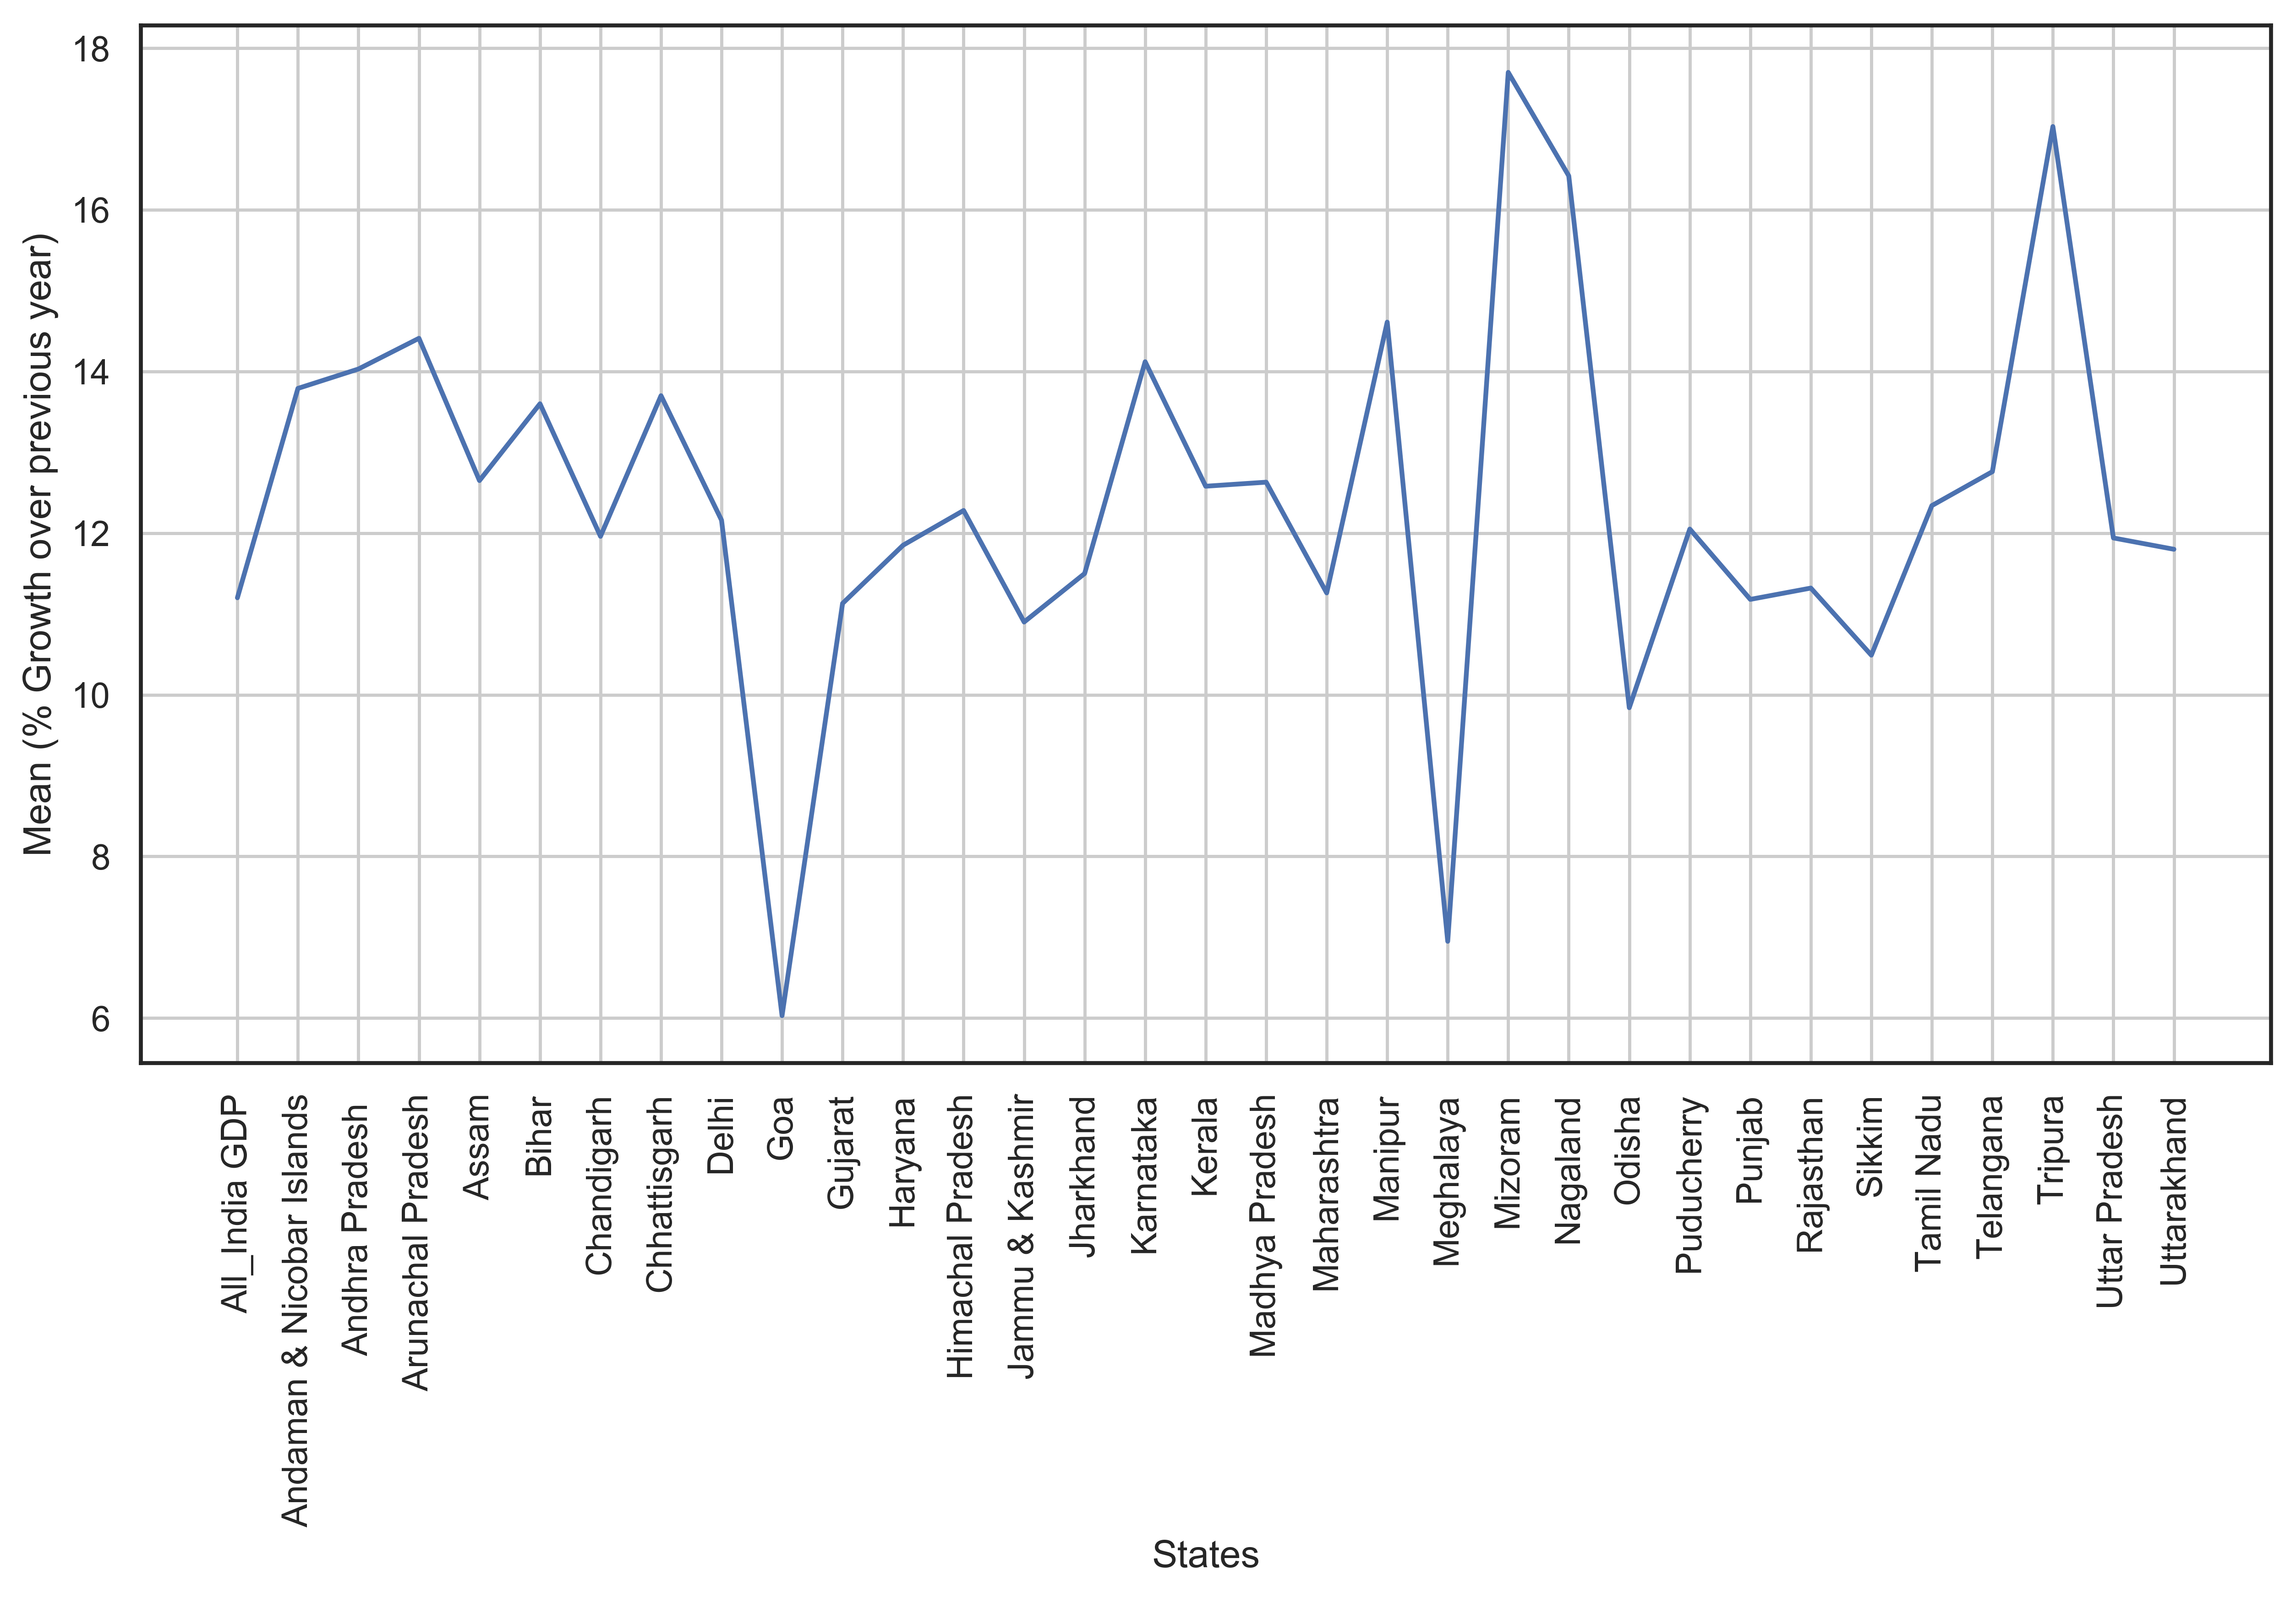

In [31]:
plt.figure(figsize=(12,6),dpi = 500)
sns.lineplot(x=d1.index, y=d1['Mean (% Growth over previous year)'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.grid()
plt.show()

Plotting the % Growth over previous year for the years 2013-14, 2014-15, 2015-16 and comparing with mean % Growth over previous year

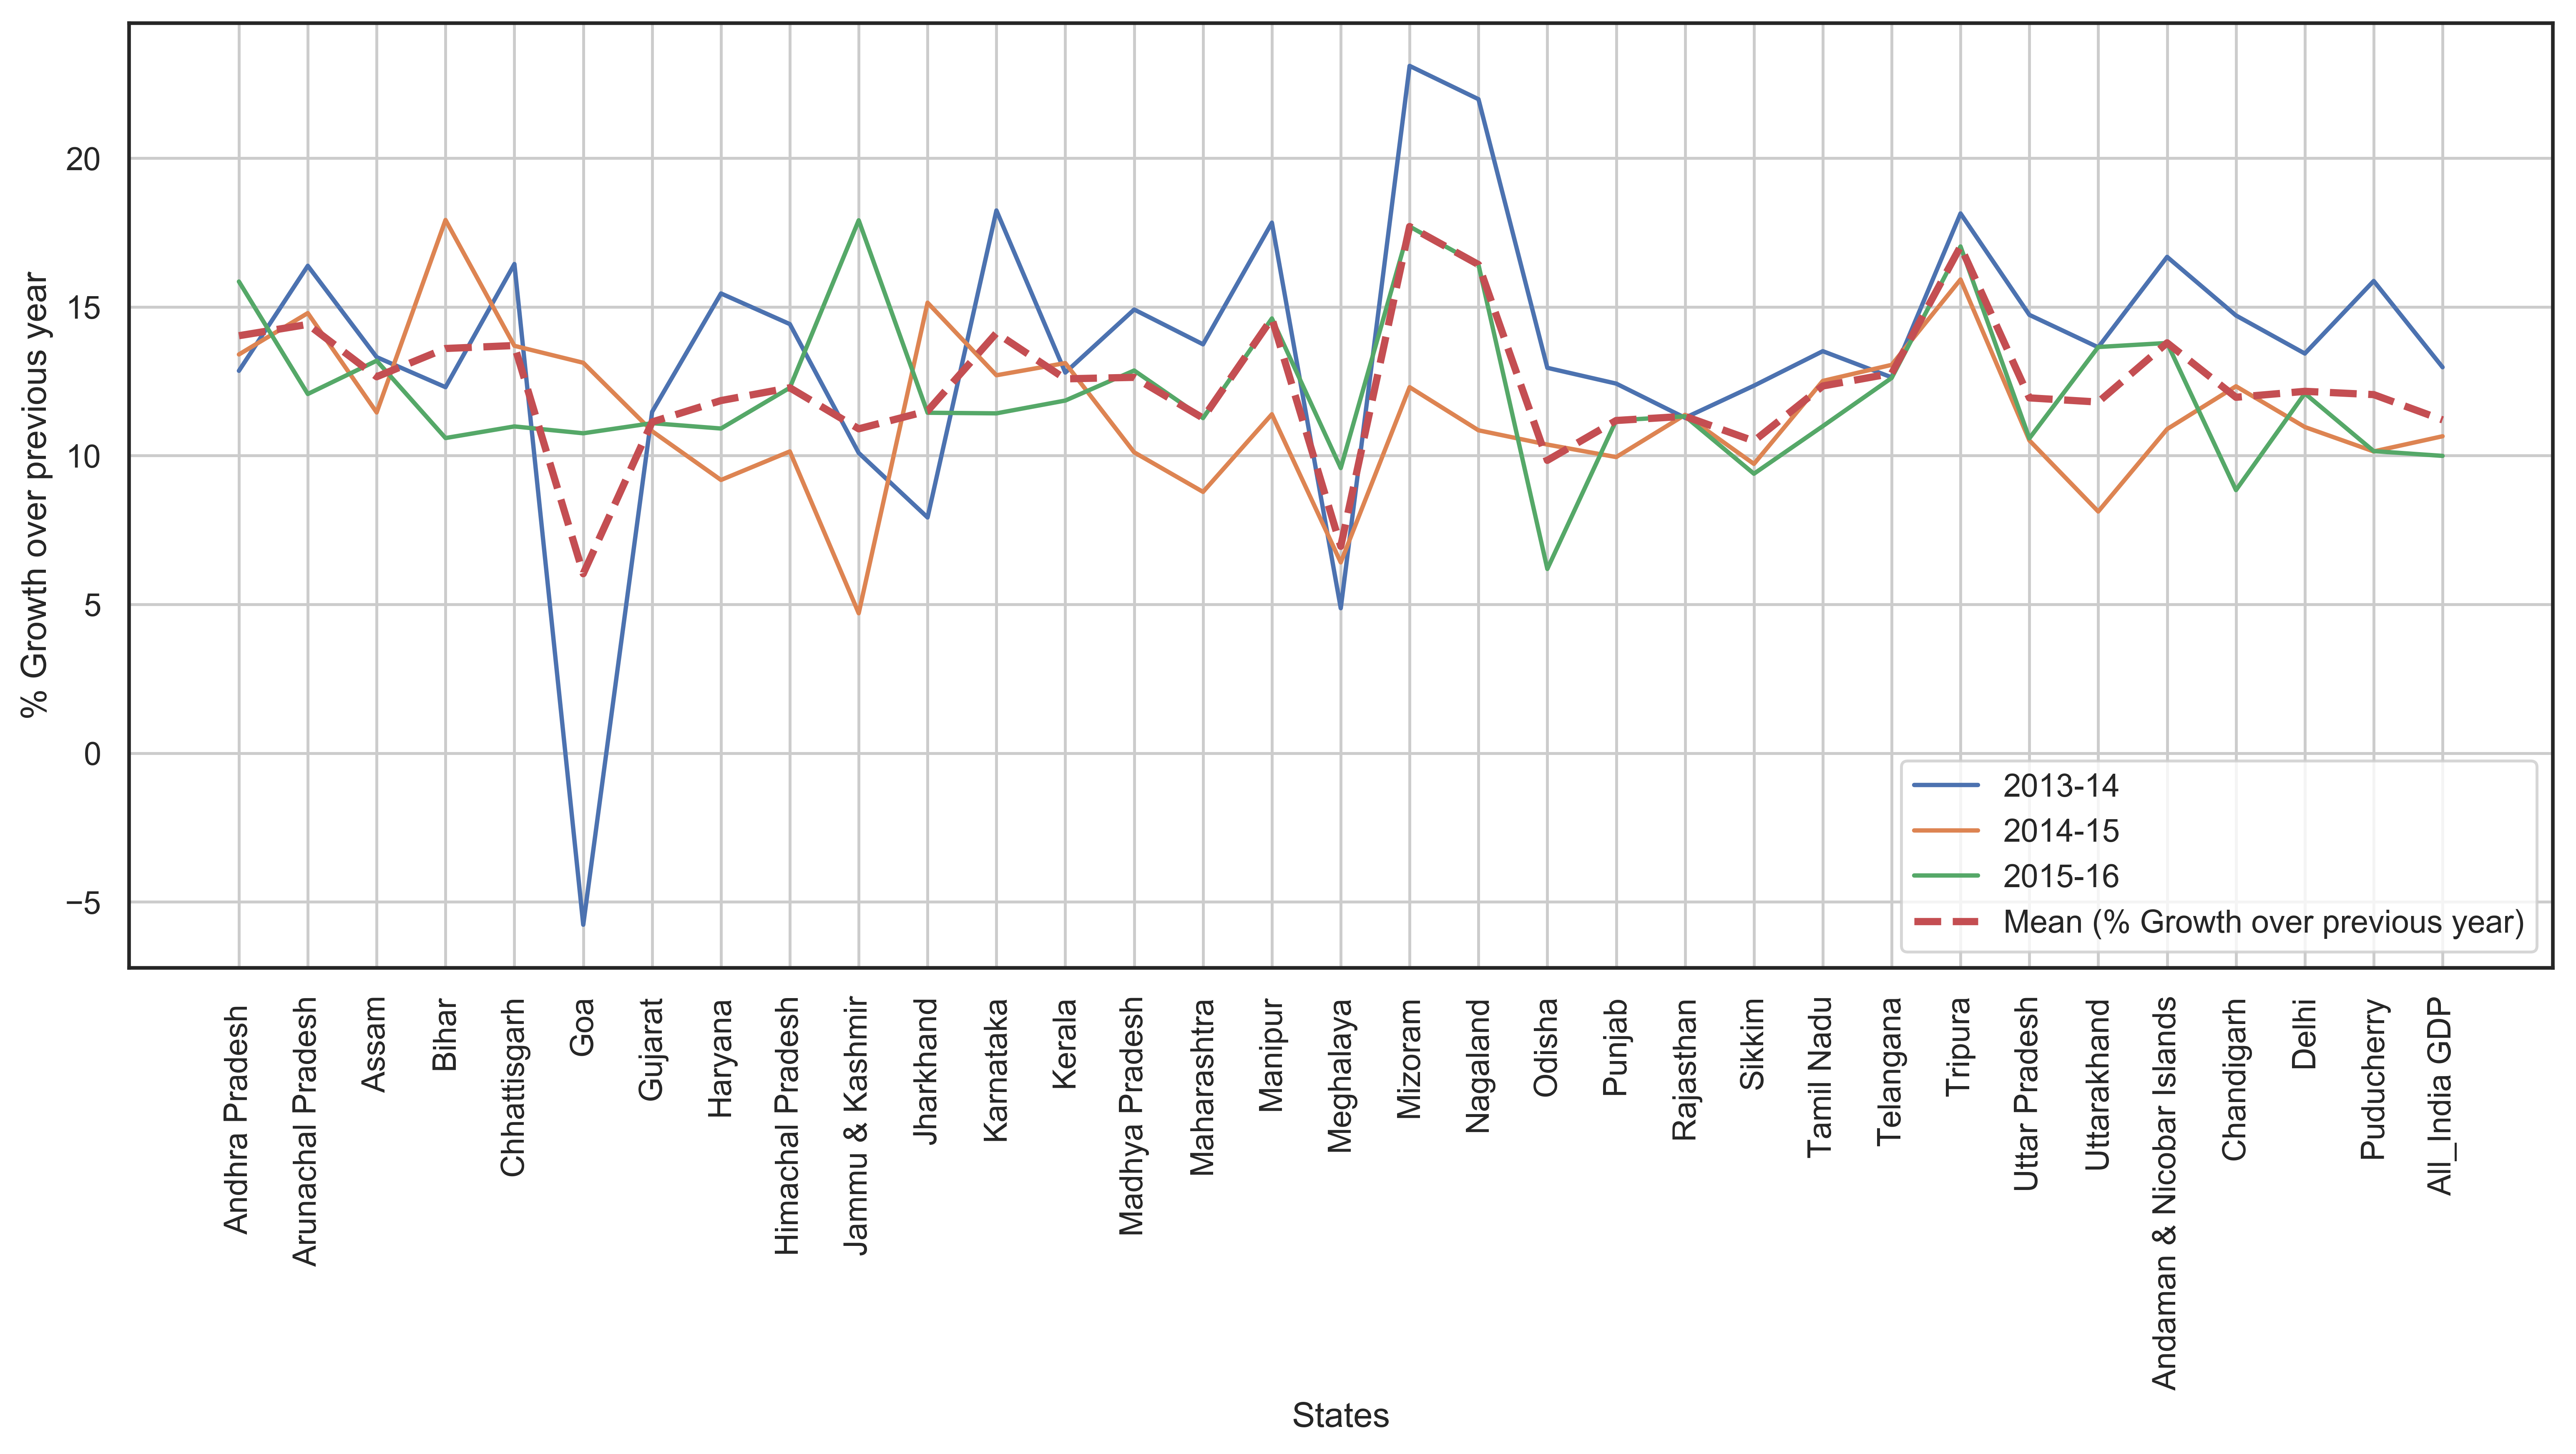

In [32]:
plt.figure(figsize=(15,6), dpi=500)
plt.plot(d1.index,d1['2013-14'])
plt.plot(d1.index,d1['2014-15'])
plt.plot(d1.index,d1['2015-16'])
plt.plot(d1.index,d1['Mean (% Growth over previous year)'],'r--', linewidth = 2.5)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('% Growth over previous year')
plt.legend()
plt.grid()
plt.show()

### Answers for Task 2

Which states have been growing consistently fast, and which ones have been struggling?

Answer: As we can see from the graph, state of **Andhra Pradesh and Meghalaya** has been growing consistently fast.
But the growth of state of **Arunachal Pradesh, Chhattisgarh, Karnataka, Kerala, Madhya Pradesh, Odisha, Tamil Nadu, Chandigarh, and Puducherry** is descreasing consistently. These states have been struggling with the growth percentage.


Curiosity exercise - what has been the average growth rate of your home state, and how does it compare to the national average over this duration?

My home state is **Uttar Pradesh** , average growth for my state is **11.94 %** which is more than the average growth of all india i.e **11.2 %**

### Task 3

Plot the total GDP of the states for the year 2015-16:

Identify the top-5 and the bottom-5 states based on total GDP

In [33]:
#selecting the data according to the problem statement
d2 = data_part1[(data_part1['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)') &
          (data_part1['Duration']=='2015-16')]

In [34]:
#removing all india GDP
d2 = d2.iloc[:,:-1]

In [35]:
#getting the missing values
missing_data(d2)

% of missing value  Count of Missing Values
Manipur                                 100.0                        1
Himachal Pradesh                        100.0                        1
Andaman & Nicobar Islands               100.0                        1
West Bengal1                            100.0                        1
Maharashtra                             100.0                        1
Tripura                                 100.0                        1
Mizoram                                 100.0                        1
Nagaland                                100.0                        1
Rajasthan                               100.0                        1
Punjab                                  100.0                        1
Goa                                       0.0                        0
Haryana                                   0.0                        0
Gujarat                                   0.0                        0
Chhattisgarh                              0.0                        0
Jharkhand                                 0.0                        0
Bihar                                     0.0                        0
Assam                                     0.0                        0
Arunachal Pradesh                         0.0                        0
Andhra Pradesh                            0.0                        0
Duration                                  0.0                        0
Jammu & Kashmir                           0.0                        0
Puducherry                                0.0                        0
Karnataka                                 0.0                        0
Kerala                                    0.0                        0
Madhya Pradesh                            0.0                        0
Delhi                                     0.0                        0
Meghalaya                                 0.0                        0
Odisha                                    0.0                        0
Sikkim                                    0.0                        0
Tamil Nadu                                0.0                        0
Telangana                                 0.0                        0
Uttar Pradesh                             0.0                        0
Uttarakhand                               0.0                        0
Chandigarh                                0.0                        0
Items  Description                        0.0                        0

In [36]:
#creating list of columns having missing values
missing_value_col_list2 = list(missing_data(d2)[missing_data(d2)['Count of Missing Values'] > 0].index)

In [37]:
missing_value_col_list2

['Manipur',
 'Himachal Pradesh',
 'Andaman & Nicobar Islands',
 'West Bengal1',
 'Maharashtra',
 'Tripura',
 'Mizoram',
 'Nagaland',
 'Rajasthan',
 'Punjab']

In [38]:
#deleting the columns containing missing value from data frame d2
d2 = d2.drop(missing_value_col_list2, axis=1)

In [39]:
d2.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Meghalaya', 'Odisha', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Uttar Pradesh', 'Uttarakhand', 'Chandigarh', 'Delhi',
       'Puducherry'],
      dtype='object')

In [40]:
# Removing Chandigarh, Delhi and Puducherry as they are UTs
d2 = d2.drop(['Chandigarh', 'Delhi','Puducherry'],axis=1)

In [41]:
missing_data(d2)

% of missing value  Count of Missing Values
Uttarakhand                        0.0                        0
Uttar Pradesh                      0.0                        0
Duration                           0.0                        0
Andhra Pradesh                     0.0                        0
Arunachal Pradesh                  0.0                        0
Assam                              0.0                        0
Bihar                              0.0                        0
Chhattisgarh                       0.0                        0
Goa                                0.0                        0
Gujarat                            0.0                        0
Haryana                            0.0                        0
Jammu & Kashmir                    0.0                        0
Jharkhand                          0.0                        0
Karnataka                          0.0                        0
Kerala                             0.0                        0
Madhya Pradesh                     0.0                        0
Meghalaya                          0.0                        0
Odisha                             0.0                        0
Sikkim                             0.0                        0
Tamil Nadu                         0.0                        0
Telangana                          0.0                        0
Items  Description                 0.0                        0

In [42]:
#transposing the dataframe
d2= d2.T

In [43]:
d2

4
Items  Description  GSDP - CURRENT PRICES (` in Crore)
Duration                                       2015-16
Andhra Pradesh                                  609934
Arunachal Pradesh                                18784
Assam                                           224234
Bihar                                           413503
Chhattisgarh                                    260776
Goa                                              45002
Gujarat                                         994316
Haryana                                         485184
Jammu & Kashmir                                 118387
Jharkhand                                       241955
Karnataka                                  1.02707e+06
Kerala                                          588337
Madhya Pradesh                                  543975
Meghalaya                                        26745
Odisha                                          341887
Sikkim                                           16637
Tamil Nadu                                 1.21267e+06
Telangana                                       575631
Uttar Pradesh                               1.1538e+06
Uttarakhand                                     184091

In [44]:
#renaming the column
d2.columns = ['2015-16']

In [45]:
#dropping unnecessary rows
d2.drop('Items  Description', axis=0, inplace = True)
d2.drop('Duration', axis=0, inplace = True)

In [46]:
#sorting the dataframe
d2 = d2.sort_values(by='2015-16')

In [47]:
#checking datatype of 2015-16 column
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Sikkim to Tamil Nadu
Data columns (total 1 columns):
2015-16    20 non-null object
dtypes: object(1)
memory usage: 320.0+ bytes


In [48]:
# converting column to float
d2['2015-16'] = d2['2015-16'].apply(lambda x : float(x))

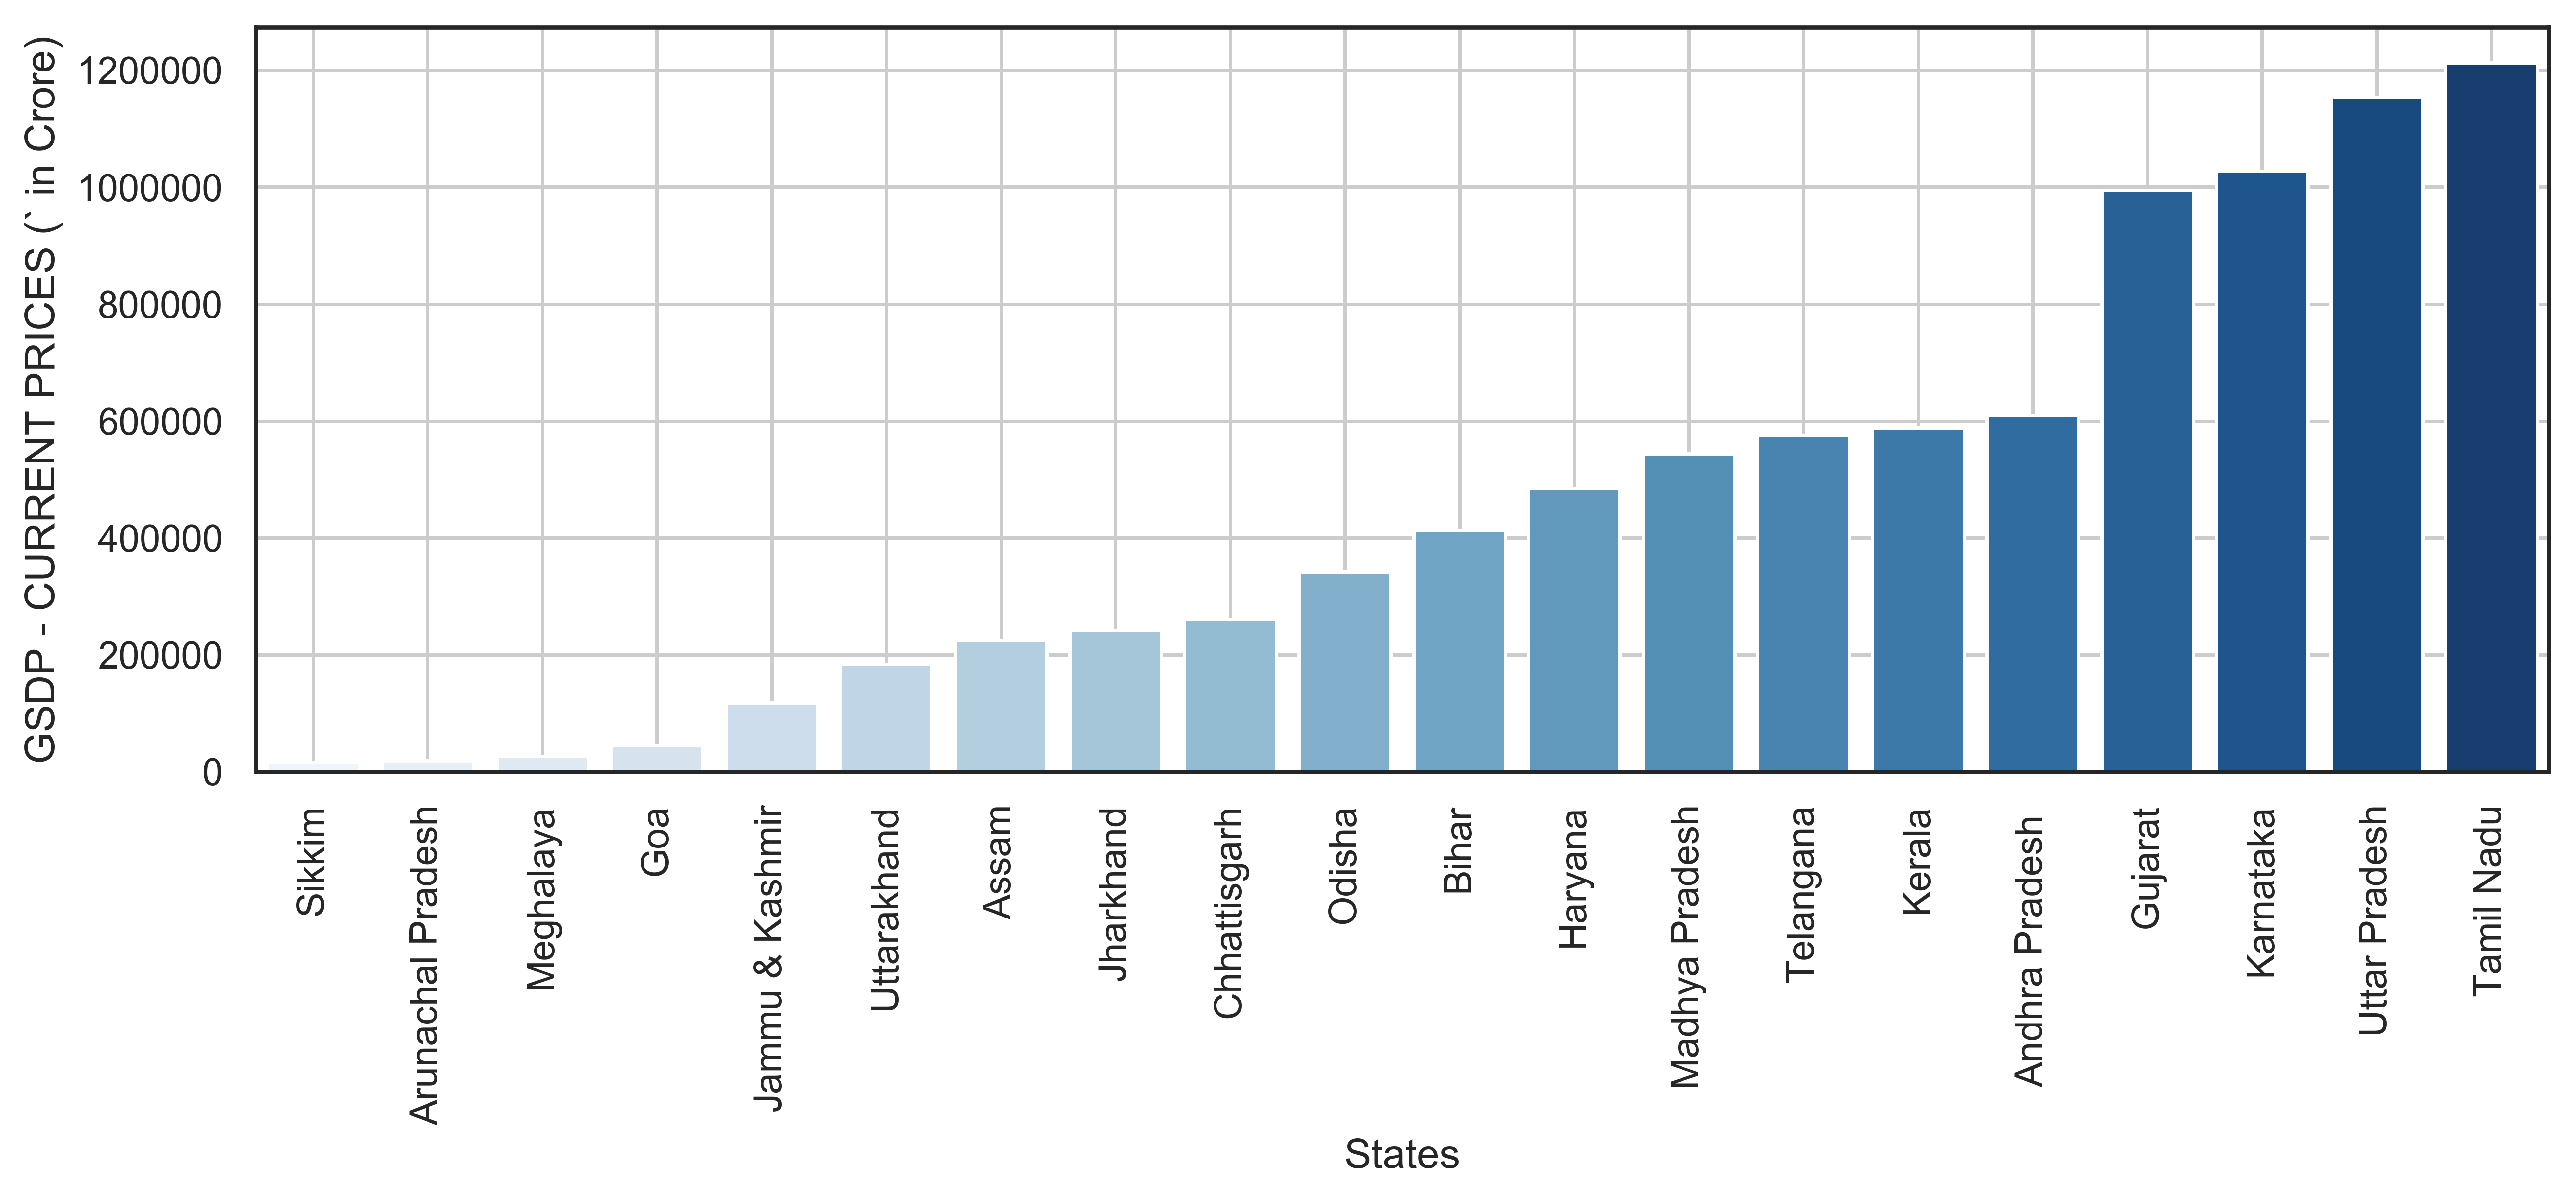

In [49]:
#Plot of state GDP
plt.figure(figsize=(12,4),dpi = 500)
sns.barplot(x=d2.index, y=d2['2015-16'],palette="Blues")
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('GSDP - CURRENT PRICES (` in Crore)')
plt.grid()
plt.show()

### Answer to the problem statement:
Top 5 States : **Andhra pradesh, Gujarat, Karnataka, Uttar Pradesh and Tamil Nadu**

Bottom 5 States : **Sikkim, Arunachal Pradesh, Meghalaya, Goa and Jammu & Kashmir**

## Part I-B:

**Performing the analysis only for the duration : 2014-15**

### Task 1

Plot the GDP per capita for all the states.

In [50]:
#loading all the datasets
andhra_pradesh = pd.read_csv('NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv')
arunachal_pradesh = pd.read_csv('NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv')
assam = pd.read_csv('NAD-Assam-GSVA_cur_2015-16.csv')
bihar = pd.read_csv('NAD-Bihar-GSVA_cur_2015-16.csv')
chattisgarh = pd.read_csv('NAD-Chhattisgarh-GSVA_cur_2016-17.csv')
goa = pd.read_csv('NAD-Goa-GSVA_cur_2015-16.csv')
gujrat = pd.read_csv('NAD-Gujarat-GSVA_cur_2015-16.csv')
haryana = pd.read_csv('NAD-Haryana-GSVA_cur_2016-17.csv')
himachal_pradesh = pd.read_csv('NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv')
jharkhand = pd.read_csv('NAD-Jharkhand-GSVA_cur_2015-16.csv')
karnataka = pd.read_csv('NAD-Karnataka-GSVA_cur_2015-16.csv')
kerela = pd.read_csv('NAD-Kerala-GSVA_cur_2015-16.csv')
madhya_pradesh = pd.read_csv('NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv')
maharashtra = pd.read_csv('NAD-Maharashtra-GSVA_cur_2014-15.csv')
manipur = pd.read_csv('NAD-Manipur-GSVA_cur_2014-15.csv',encoding = "ISO-8859-1")
meghalaya = pd.read_csv('NAD-Meghalaya-GSVA_cur_2016-17.csv')
mizoram = pd.read_csv('NAD-Mizoram-GSVA_cur_2014-15.csv')
nagaland = pd.read_csv('NAD-Nagaland-GSVA_cur_2014-15.csv')
odisha = pd.read_csv('NAD-Odisha-GSVA_cur_2016-17.csv')
punjab = pd.read_csv('NAD-Punjab-GSVA_cur_2014-15.csv')
rajasthan = pd.read_csv('NAD-Rajasthan-GSVA_cur_2014-15.csv')
sikkim = pd.read_csv('NAD-Sikkim-GSVA_cur_2015-16.csv')
tamil_nadu = pd.read_csv('NAD-Tamil_Nadu-GSVA_cur_2016-17.csv')
telangna = pd.read_csv('NAD-Telangana-GSVA_cur_2016-17.csv')
tripura = pd.read_csv('NAD-Tripura-GSVA_cur_2014-15.csv')
uttar_pradesh = pd.read_csv('NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv')
uttarakhand = pd.read_csv('NAD-Uttarakhand-GSVA_cur_2015-16.csv')

**I will create one master dataframe all_state containing all state 2014-15 data.**

In [51]:
#getting the first state data
all_state = andhra_pradesh.loc[:,['S.No.','Item','2014-15']]

In [52]:
#renaming column name
all_state = all_state.rename(columns={'2014-15':'Andhra_Pradesh'})

In [53]:
all_state.head()

S.No.                               Item  Andhra_Pradesh
0     1  Agriculture, forestry and fishing        14819416
1   1.1                              Crops         7893514
2   1.2                          Livestock         4309078
3   1.3               Forestry and logging          346160
4   1.4            Fishing and aquaculture         2270664

In [54]:
#adding data of each state to all_state data
all_state['Arunachal_Pradesh'] = arunachal_pradesh ['2014-15']
all_state['Assam'] = assam ['2014-15']
all_state['Bihar'] = bihar ['2014-15']
all_state['Chattisgarh'] = chattisgarh ['2014-15']
all_state['Goa'] = goa ['2014-15']
all_state['Gujrat'] = gujrat ['2014-15']
all_state['Haryana'] = haryana ['2014-15']
all_state['Himachal_pradesh'] = himachal_pradesh ['2014-15']
all_state['Jharkhand'] = jharkhand ['2014-15']
all_state['Karnataka'] = karnataka ['2014-15']
all_state['Kerela'] = kerela ['2014-15']
all_state['Madhya_Pradesh'] = madhya_pradesh ['2014-15']
all_state['Maharashtra'] = maharashtra ['2014-15']
all_state['Manipur'] = manipur ['2014-15']
all_state['Meghalaya'] = meghalaya ['2014-15']
all_state['Mizoram'] = mizoram ['2014-15']
all_state['Nagaland'] = nagaland ['2014-15']
all_state['Odisha'] = odisha ['2014-15']
all_state['Punjab'] = punjab ['2014-15']
all_state['Rajasthan'] = rajasthan ['2014-15']
all_state['Sikkim'] = sikkim ['2014-15']
all_state['Tamil_Nadu'] = tamil_nadu ['2014-15']
all_state['Telangna'] = telangna ['2014-15']
all_state['Tripura'] = tripura ['2014-15']
all_state['Uttar_Pradesh'] = uttar_pradesh ['2014-15']
all_state['Uttarakhand'] = uttarakhand ['2014-15']

In [55]:
#checking all_state data
all_state.head()

S.No.                               Item  Andhra_Pradesh  Arunachal_Pradesh  \
0     1  Agriculture, forestry and fishing        14819416             686117   
1   1.1                              Crops         7893514             415520   
2   1.2                          Livestock         4309078              38387   
3   1.3               Forestry and logging          346160             224017   
4   1.4            Fishing and aquaculture         2270664               8193   

     Assam    Bihar  Chattisgarh     Goa      Gujrat    Haryana  ...  \
0  3855548  7951890      3948847  308507  13769969.0  8015238.0  ...   
1  2890544  4688237      2613371  140421   9671086.0  4636731.0  ...   
2   173478  2060296       352208   30141   2698910.0  2916173.0  ...   
3   261987   550132       597785   15744    761616.0   352254.0  ...   
4   529539   653224       385483  122201    638357.0   110080.0  ...   

   Nagaland   Odisha   Punjab  Rajasthan  Sikkim  Tamil_Nadu  Telangna  \
0    607897  6422978  9285716   15044394  137447    13064238   7591501   
1    375825  4382636  5690972    7673441  114976     7297820   4162493   
2    123800   788243  2638842    5356257   17338     4693361   2951299   
3     99802   791463   848245    1956660    4529      392705    210741   
4      8470   460636   107657      58036     604      680352    266968   

    Tripura  Uttar_Pradesh  Uttarakhand  
0  799825.0       25097754    1601423.0  
1  397591.0       16215212     866146.0  
2   88176.0        7096876     391188.0  
3  145096.0        1404936     339293.0  
4  168961.0         380730       4796.0  

[5 rows x 29 columns]

In [56]:
#combining the S.No and Item , this will help in our further analysis
all_state['Item'] = all_state['S.No.'] +" "+ all_state['Item']

In [57]:
all_state.head()

S.No.                                 Item  Andhra_Pradesh  \
0     1  1 Agriculture, forestry and fishing        14819416   
1   1.1                            1.1 Crops         7893514   
2   1.2                        1.2 Livestock         4309078   
3   1.3             1.3 Forestry and logging          346160   
4   1.4          1.4 Fishing and aquaculture         2270664   

   Arunachal_Pradesh    Assam    Bihar  Chattisgarh     Goa      Gujrat  \
0             686117  3855548  7951890      3948847  308507  13769969.0   
1             415520  2890544  4688237      2613371  140421   9671086.0   
2              38387   173478  2060296       352208   30141   2698910.0   
3             224017   261987   550132       597785   15744    761616.0   
4               8193   529539   653224       385483  122201    638357.0   

     Haryana  ...  Nagaland   Odisha   Punjab  Rajasthan  Sikkim  Tamil_Nadu  \
0  8015238.0  ...    607897  6422978  9285716   15044394  137447    13064238   
1  4636731.0  ...    375825  4382636  5690972    7673441  114976     7297820   
2  2916173.0  ...    123800   788243  2638842    5356257   17338     4693361   
3   352254.0  ...     99802   791463   848245    1956660    4529      392705   
4   110080.0  ...      8470   460636   107657      58036     604      680352   

   Telangna   Tripura  Uttar_Pradesh  Uttarakhand  
0   7591501  799825.0       25097754    1601423.0  
1   4162493  397591.0       16215212     866146.0  
2   2951299   88176.0        7096876     391188.0  
3    210741  145096.0        1404936     339293.0  
4    266968  168961.0         380730       4796.0  

[5 rows x 29 columns]

In [58]:
all_state = all_state.T

In [59]:
all_state.columns = list(all_state.iloc[1,])

In [60]:
all_state.head()

1 Agriculture, forestry and fishing  1.1 Crops  \
S.No.                                                1        1.1   
Item               1 Agriculture, forestry and fishing  1.1 Crops   
Andhra_Pradesh                                14819416    7893514   
Arunachal_Pradesh                               686117     415520   
Assam                                          3855548    2890544   

                   1.2 Livestock  1.3 Forestry and logging  \
S.No.                        1.2                       1.3   
Item               1.2 Livestock  1.3 Forestry and logging   
Andhra_Pradesh           4309078                    346160   
Arunachal_Pradesh          38387                    224017   
Assam                     173478                    261987   

                   1.4 Fishing and aquaculture  2 Mining and quarrying  \
S.No.                                      1.4                       2   
Item               1.4 Fishing and aquaculture  2 Mining and quarrying   
Andhra_Pradesh                         2270664                 1484300   
Arunachal_Pradesh                         8193                   30842   
Assam                                   529539                 1471149   

                   Total Primary  3 Manufacturing  \
S.No.                      Total                3   
Item               Total Primary  3 Manufacturing   
Andhra_Pradesh          16303716          4672266   
Arunachal_Pradesh         716959            26120   
Assam                    5326697          2002936   

                  4 Electricity, gas, water supply & other utility services  \
S.No.                                                              4          
Item               4 Electricity, gas, water supply & other utili...          
Andhra_Pradesh                                               1151729          
Arunachal_Pradesh                                             113527          
Assam                                                         296587          

                   5 Construction  ...  \
S.No.                           5  ...   
Item               5 Construction  ...   
Andhra_Pradesh            4664889  ...   
Arunachal_Pradesh          147842  ...   
Assam                     1733568  ...   

                  9 Real estate, ownership of dwelling & professional services  \
S.No.                                                              9             
Item               9 Real estate, ownership of dwelling & profess...             
Andhra_Pradesh                                               4405409             
Arunachal_Pradesh                                              48418             
Assam                                                        1412466             

                   10 Public administration  11 Other services  \
S.No.                                    10                 11   
Item               10 Public administration  11 Other services   
Andhra_Pradesh                      2200897            4215389   
Arunachal_Pradesh                    243867             218728   
Assam                               1373611            1795658   

                   Total Tertiary  12 TOTAL GSVA at basic prices  \
S.No.                       Total                             12   
Item               Total Tertiary  12 TOTAL GSVA at basic prices   
Andhra_Pradesh           22032942                       48825542   
Arunachal_Pradesh          631844                        1636292   
Assam                     9307109                       18666897   

                   13 Taxes on Products  14 Subsidies on products  \
S.No.                                13                        14   
Item               13 Taxes on Products  14 Subsidies on products   
Andhra_Pradesh                  5512100                   1690800   
Arunachal_Pradesh                 70099                     30272   
Assam                           1725309                    582406   

                   15 Gro

In [61]:
#dropping useless row
all_state = all_state.drop('S.No.', axis=0)

In [62]:
#dropping useless row
all_state = all_state.drop('Item', axis=0)

In [63]:
all_state.head()

1 Agriculture, forestry and fishing 1.1 Crops 1.2 Livestock  \
Andhra_Pradesh                               14819416   7893514       4309078   
Arunachal_Pradesh                              686117    415520         38387   
Assam                                         3855548   2890544        173478   
Bihar                                         7951890   4688237       2060296   
Chattisgarh                                   3948847   2613371        352208   

                  1.3 Forestry and logging 1.4 Fishing and aquaculture  \
Andhra_Pradesh                      346160                     2270664   
Arunachal_Pradesh                   224017                        8193   
Assam                               261987                      529539   
Bihar                               550132                      653224   
Chattisgarh                         597785                      385483   

                  2 Mining and quarrying Total Primary 3 Manufacturing  \
Andhra_Pradesh                   1484300      16303716         4672266   
Arunachal_Pradesh                  30842        716959           26120   
Assam                            1471149       5326697         2002936   
Bihar                              68107       8019997         2189965   
Chattisgarh                      2451970       6400817         4370593   

                  4 Electricity, gas, water supply & other utility services  \
Andhra_Pradesh                                               1151729          
Arunachal_Pradesh                                             113527          
Assam                                                         296587          
Bihar                                                         345168          
Chattisgarh                                                  1198438          

                  5 Construction  ...  \
Andhra_Pradesh           4664889  ...   
Arunachal_Pradesh         147842  ...   
Assam                    1733568  ...   
Bihar                    3449763  ...   
Chattisgarh              2669855  ...   

                  9 Real estate, ownership of dwelling & professional services  \
Andhra_Pradesh                                               4405409             
Arunachal_Pradesh                                              48418             
Assam                                                        1412466             
Bihar                                                        3740641             
Chattisgarh                                                  2462166             

                  10 Public administration 11 Other services Total Tertiary  \
Andhra_Pradesh                     2200897           4215389       22032942   
Arunachal_Pradesh                   243867            218728         631844   
Assam                              1373611           1795658        9307109   
Bihar                              2078171           4587589       22179969   
Chattisgarh                         867982           1112232        7588778   

                  12 TOTAL GSVA at basic prices 13 Taxes on Products  \
Andhra_Pradesh                         48825542              5512100   
Arunachal_Pradesh                       1636292                70099   
Assam                                  18666897              1725309   
Bihar                                  36184863              3213546   
Chattisgarh                            22228481              2601791   

                  14 Subsidies on products 15 Gross State Domestic Product  \
Andhra_Pradesh                     1690800                        52646842   
Arunachal_Pradesh                    30272                         1676119   
Assam                               582406                        19809800   
Bihar                              2006421                        37391988   
Chattisgarh                        1332092                        23498180   

                  16 Population ('00) 17 Per Capi

In [64]:
all_state.shape

(27, 33)

In [65]:
#checking missing data in our all_state dataframe by the function created at the start of the notebook
missing_data(all_state)

% of missing value  \
7.3 Water transport                                              22.22   
7.4 Air transport                                                11.11   
7.2 Road transport                                                7.41   
6.2 Hotels & restaurants                                          7.41   
7.5 Services incidental to transport                              3.70   
2 Mining and quarrying                                            3.70   
7.6 Storage                                                       3.70   
5 Construction                                                    0.00   
6 Trade, repair, hotels and restaurants                           0.00   
Total Secondary                                                   0.00   
4 Electricity, gas, water supply & other utilit...                0.00   
3 Manufacturing                                                   0.00   
Total Primary                                                     0.00   
1.4 Fishing and aquaculture                                       0.00   
1.3 Forestry and logging                                          0.00   
1.2 Livestock                                                     0.00   
1.1 Crops                                                         0.00   
6.1 Trade & repair services                                       0.00   
17 Per Capita GSDP (Rs.)                                          0.00   
7 Transport, storage, communication & services ...                0.00   
7.1 Railways                                                      0.00   
16 Population ('00)                                               0.00   
7.7 Communication & services related to broadca...                0.00   
8 Financial services                                              0.00   
9 Real estate, ownership of dwelling & professi...                0.00   
10 Public administration                                          0.00   
11 Other services                                                 0.00   
Total Tertiary                                                    0.00   
12 TOTAL GSVA at basic prices                                     0.00   
13 Taxes on Products                                              0.00   
14 Subsidies on products                                          0.00   
15 Gross State Domestic Product                                   0.00   
1 Agriculture, forestry and fishing                               0.00   

                                                    Count of Missing Values  
7.3 Water transport                                                       6  
7.4 Air transport                                                         3  
7.2 Road transport                                                        2  
6.2 Hotels & restaurants                                                  2  
7.5 Services incidental to transport                                      1  
2 Mining and quarrying                                                    1  
7.6 Storage                                                               1  
5 Construction                                                            0  
6 Trade, repair, hotels and restaurants                                   0  
Total Secondary                                                           0  
4 Electricity, gas, water supply & other utilit...                        0  
3 Manufacturing                                                           0  
Total Primary                                                             0  
1.4 Fishing and aquaculture                                               0  
1.3 Forestry and logging                                                  0  
1.2 Livestock                                                             0  
1.1 Crops                                                                 0  
6.1 Trade & repair services                                               0  
17 Per Capita GSDP (Rs.)                             

In [66]:
all_state.columns

Index(['1 Agriculture, forestry and fishing', '1.1 Crops', '1.2 Livestock',
       '1.3 Forestry and logging', '1.4 Fishing and aquaculture',
       '2 Mining and quarrying', 'Total Primary', '3 Manufacturing',
       '4 Electricity, gas, water supply & other utility services',
       '5 Construction', 'Total Secondary',
       '6 Trade, repair, hotels and restaurants',
       '6.1 Trade & repair services', '6.2 Hotels & restaurants',
       '7 Transport, storage, communication & services related to broadcasting',
       '7.1 Railways', '7.2 Road transport', '7.3 Water transport',
       '7.4 Air transport', '7.5 Services incidental to transport',
       '7.6 Storage', '7.7 Communication & services related to broadcasting',
       '8 Financial services',
       '9 Real estate, ownership of dwelling & professional services',
       '10 Public administration', '11 Other services', 'Total Tertiary',
       '12 TOTAL GSVA at basic prices', '13 Taxes on Products',
       '14 Subsidies on pr

In [67]:
all_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Andhra_Pradesh to Uttarakhand
Data columns (total 33 columns):
1 Agriculture, forestry and fishing                                       27 non-null object
1.1 Crops                                                                 27 non-null object
1.2 Livestock                                                             27 non-null object
1.3 Forestry and logging                                                  27 non-null object
1.4 Fishing and aquaculture                                               27 non-null object
2 Mining and quarrying                                                    26 non-null object
Total Primary                                                             27 non-null object
3 Manufacturing                                                           27 non-null object
4 Electricity, gas, water supply & other utility services                 27 non-null object
5 Construction                             

In [68]:
#changing the data type of all columns to float
def to_float(x):
    return float(x)
for cols in list(all_state.columns):
    all_state[cols] = all_state[cols].apply(to_float)

In [69]:
all_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Andhra_Pradesh to Uttarakhand
Data columns (total 33 columns):
1 Agriculture, forestry and fishing                                       27 non-null float64
1.1 Crops                                                                 27 non-null float64
1.2 Livestock                                                             27 non-null float64
1.3 Forestry and logging                                                  27 non-null float64
1.4 Fishing and aquaculture                                               27 non-null float64
2 Mining and quarrying                                                    26 non-null float64
Total Primary                                                             27 non-null float64
3 Manufacturing                                                           27 non-null float64
4 Electricity, gas, water supply & other utility services                 27 non-null float64
5 Construction                    

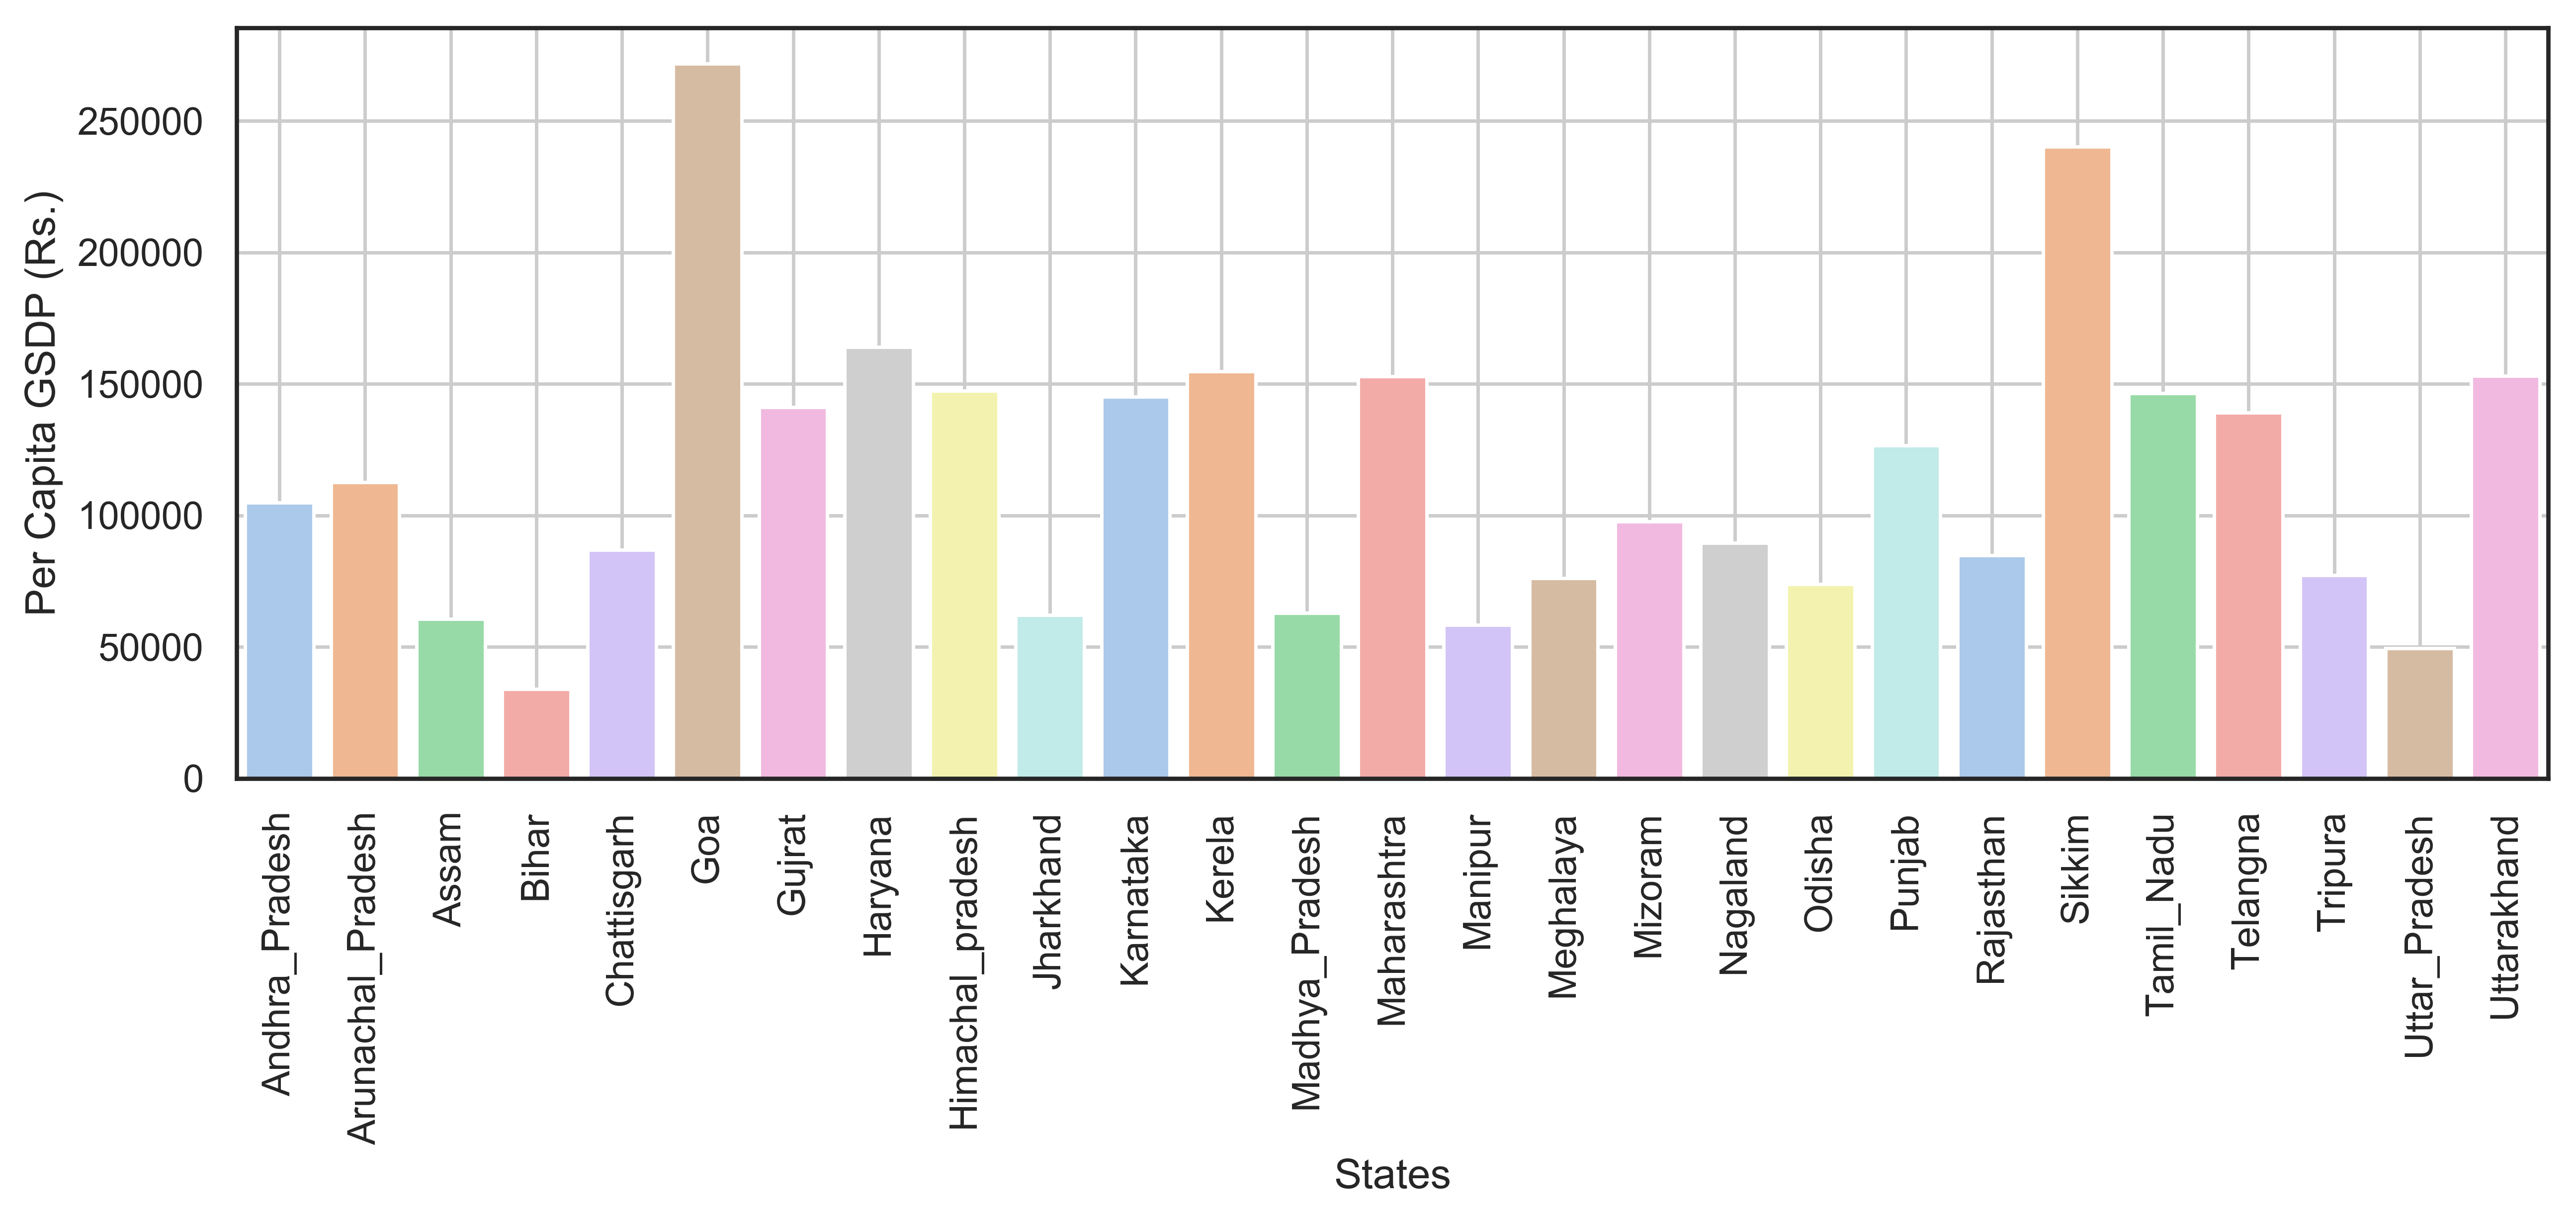

In [70]:
#Plot the GDP per capita for all the states
plt.figure(figsize=(12,4),dpi = 500)
sns.barplot(x=all_state.index, y=all_state["17 Per Capita GSDP (Rs.)"],palette="pastel")
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Per Capita GSDP (Rs.)')
plt.grid()
plt.show()

**Identify the top-5 and the bottom-5 states based on GDP per capita.**<br>
**Top 5 States:** <br>
1.Goa <br>
2.Sikkim <br>
3.Haryana <br>
4.Kerela <br>
5.Uttarakhand <br>
<br>
**Bottom 5 States:** <br>
1.Jharkhand <br>
2.Assam <br>
3.Manipur <br>
4.Uttar Pradesh <br>
5.Bihar <br>


**Find the ratio of highest per capita GDP to the lowest per capita GDP.**

In [71]:
ratio = all_state['17 Per Capita GSDP (Rs.)'].max()/all_state['17 Per Capita GSDP (Rs.)'].min()
print(ratio)

8.004741709371503


Per capita GDSP of Goa is **8 times** of Per capita of Bihar

### Task 2

Plot the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.

In [72]:
all_state['% Primary'] = round(all_state['Total Primary']/all_state['15 Gross State Domestic Product']*100,2)
all_state['% Secondary'] = round(all_state['Total Secondary']/all_state['15 Gross State Domestic Product']*100,2)
all_state['% Tertiary'] = round(all_state['Total Tertiary']/all_state['15 Gross State Domestic Product']*100,2)

In [73]:
all_state[['% Primary','% Secondary','% Tertiary']]

% Primary  % Secondary  % Tertiary
Andhra_Pradesh         30.97        19.92       41.85
Arunachal_Pradesh      42.77        17.15       37.70
Assam                  26.89        20.36       46.98
Bihar                  21.45        16.01       59.32
Chattisgarh            27.24        35.06       32.30
Goa                     7.68        38.09       42.78
Gujrat                 17.75        36.90       33.76
Haryana                18.38        28.71       43.95
Himachal_pradesh       14.84        39.47       39.60
Jharkhand              24.17        28.75       37.46
Karnataka              13.09        22.22       54.77
Kerela                 12.34        22.95       56.41
Madhya_Pradesh         37.04        20.84       37.59
Maharashtra            12.14        26.47       49.46
Manipur                21.24        12.20       65.25
Meghalaya              18.48        26.14       49.19
Mizoram                19.52        23.36       55.16
Nagaland               33.46        11.53       53.92
Odisha                 27.98        27.92       38.07
Punjab                 25.26        21.48       45.43
Rajasthan              31.22        21.28       42.50
Sikkim                  9.12        55.57       31.76
Tamil_Nadu             12.20        30.06       48.82
Telangna               17.87        19.41       55.70
Tripura                31.76        16.33       50.05
Uttar_Pradesh          24.92        24.49       44.06
Uttarakhand            11.40        47.18       34.50

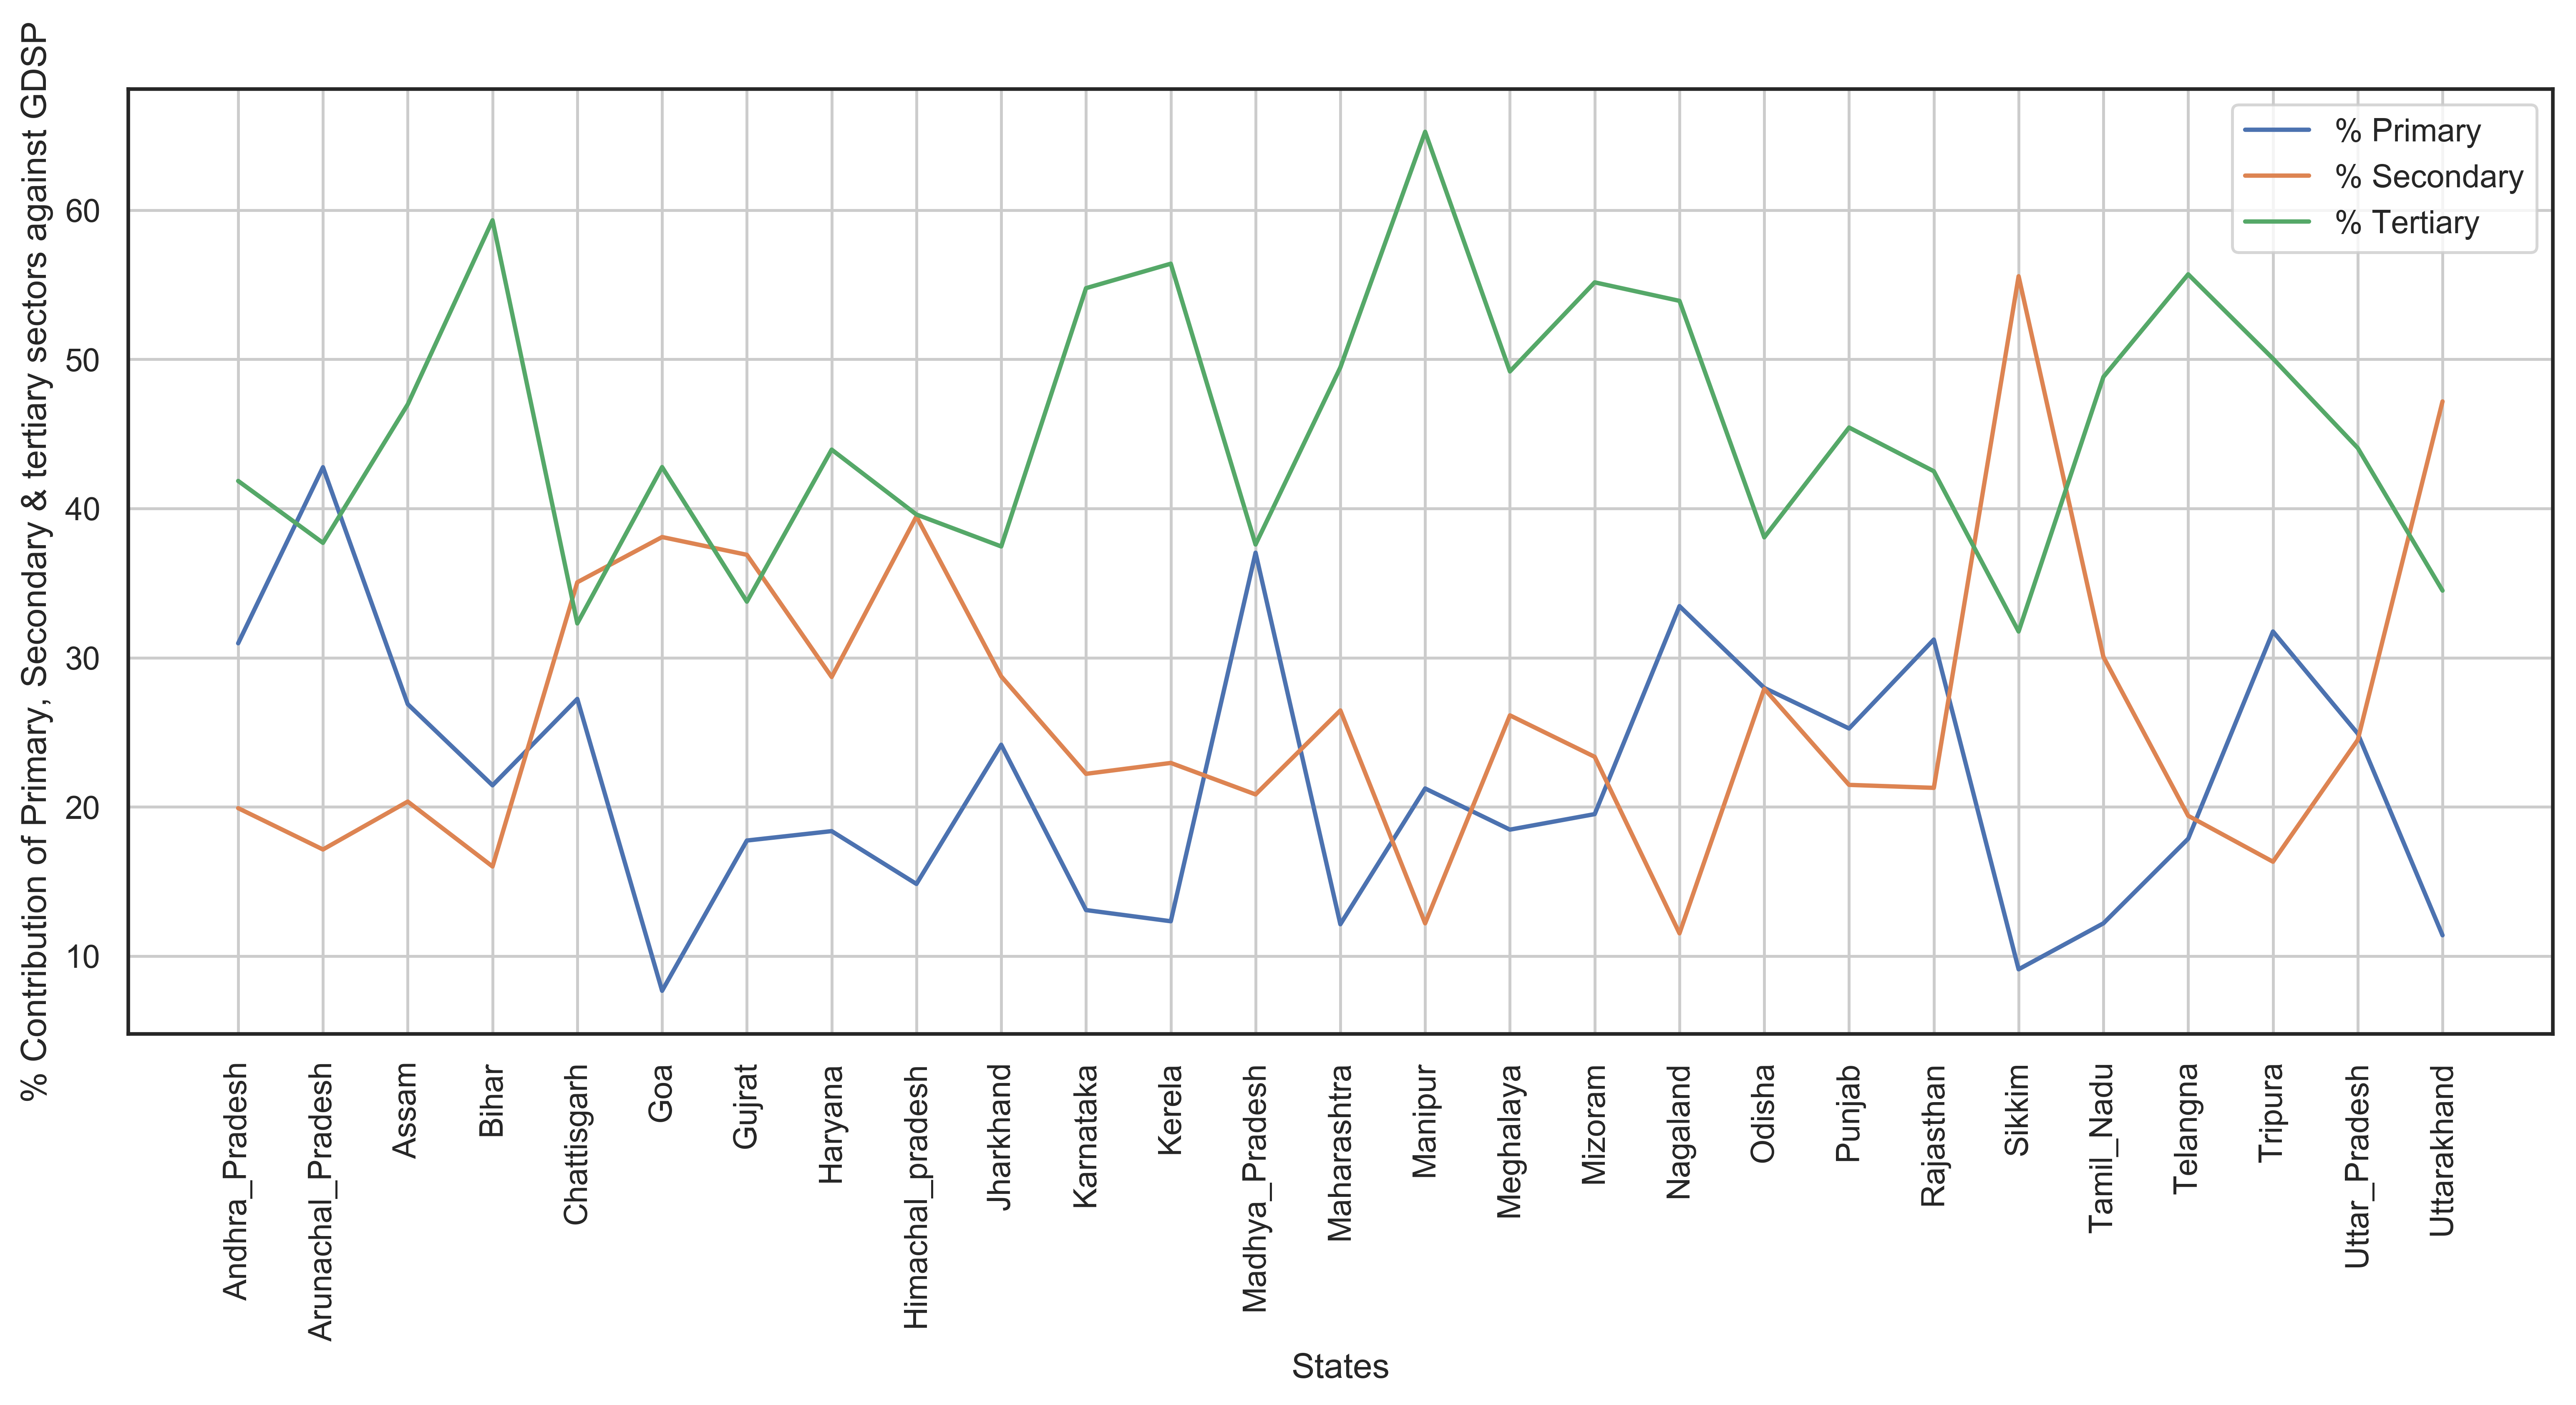

In [74]:
plt.figure(figsize=(15,6), dpi=500)
plt.plot(all_state.index,all_state['% Primary'])
plt.plot(all_state.index,all_state['% Secondary'])
plt.plot(all_state.index,all_state['% Tertiary'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('% Contribution of Primary, Secondary & tertiary sectors against GDSP')
plt.legend()
plt.grid()
plt.show()

### Task 3

Categorise the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 would have the highest per capita GDP, C4 the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e. the states lying between the 85th and the 100th percentile are in C1, those between 50th and 85th percentile are in C2 and so on. <br>
Note: Categorisation into four categories will simplify the subsequent analysis, since comparing data of all the states would become quite exhaustive

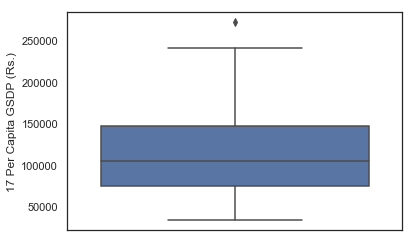

In [75]:
sns.boxplot(y=all_state['17 Per Capita GSDP (Rs.)'])
plt.show()

In [76]:
#getting quantile values
q20 = round(all_state['17 Per Capita GSDP (Rs.)'].quantile(0.20),2)
q50 = round(all_state['17 Per Capita GSDP (Rs.)'].quantile(0.50),2)
q85 = round(all_state['17 Per Capita GSDP (Rs.)'].quantile(0.85),2)
q100 = round(all_state['17 Per Capita GSDP (Rs.)'].quantile(1),2)

In [77]:
print(q20)
print(q50)
print(q85)
print(q100)

65187.0
104977.0
153246.2
271793.0


In [78]:
def categorisation(x):
    if q85 <= x <= q100:
        return "C1"
    elif q50 <= x < q85:
        return "C2"
    elif q20 <= x < q50:
        return "C3"
    else:
        return "C4"

all_state['Category'] = all_state['17 Per Capita GSDP (Rs.)'].apply(categorisation)

In [79]:
all_state[['17 Per Capita GSDP (Rs.)','Category']].sort_values(by='17 Per Capita GSDP (Rs.)', ascending=False)

17 Per Capita GSDP (Rs.) Category
Goa                                271793.0       C1
Sikkim                             240274.0       C1
Haryana                            164077.0       C1
Kerela                             154778.0       C1
Uttarakhand                        153076.0       C2
Maharashtra                        152853.0       C2
Himachal_pradesh                   147330.0       C2
Tamil_Nadu                         146503.0       C2
Karnataka                          145141.0       C2
Gujrat                             141263.0       C2
Telangna                           139035.0       C2
Punjab                             126606.0       C2
Arunachal_Pradesh                  112718.0       C2
Andhra_Pradesh                     104977.0       C2
Mizoram                             97687.0       C3
Nagaland                            89607.0       C3
Chattisgarh                         86860.0       C3
Rajasthan                           84837.0       C3
Tripura                             77358.0       C3
Meghalaya                           76228.0       C3
Odisha                              73979.0       C3
Madhya_Pradesh                      62989.0       C4
Jharkhand                           62091.0       C4
Assam                               60621.0       C4
Manipur                             58442.0       C4
Uttar_Pradesh                       49450.0       C4
Bihar                               33954.0       C4

### Task 4.1

**For each category C1, C2, C3, C4:** <br>
1.Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc.) [not primary, secondary and tertiary] which contribute to approx. 80% of the GSDP of each category
<br>
Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'
<br>
Note-II: If the top-3 sub-sectors contribute to say 79% of the GDP of some category, you can report 'these top-3 sub-sectors contribute to approx. 80% of the GDP'. This is to simplify the analysis and make the results consumable (remember, the CEO has to present the report to the CMs, and CMs have limited time, so the analysis needs to be very sharp and concise)
<br>

In [80]:
#grouping the all_state according to the category and storing the result in a new dataframe category_summary
group_by_category = all_state.groupby('Category')
category_summary = group_by_category['1 Agriculture, forestry and fishing','2 Mining and quarrying','3 Manufacturing',
                 '4 Electricity, gas, water supply & other utility services','5 Construction',
                  '6 Trade, repair, hotels and restaurants','7 Transport, storage, communication & services related to broadcasting',
                  '8 Financial services','9 Real estate, ownership of dwelling & professional services',
                  '10 Public administration', '11 Other services','15 Gross State Domestic Product'].sum()
                 

In [81]:
category_summary

1 Agriculture, forestry and fishing  2 Mining and quarrying  \
Category                                                                
C1                                 14391809.0                588961.0   
C2                                 90028438.0              11857646.0   
C3                                 27407472.0               9351471.0   
C4                                 56735044.0               6096419.0   

          3 Manufacturing  \
Category                    
C1             13758793.0   
C2            113868796.0   
C3             17366065.0   
C4             24987032.0   

          4 Electricity, gas, water supply & other utility services  \
Category                                                              
C1                                                2000998.0           
C2                                               14975107.0           
C3                                                3453045.0           
C4                                                4310264.0           

          5 Construction  6 Trade, repair, hotels and restaurants  \
Category                                                            
C1            11264451.0                               13995159.0   
C2            45318451.0                               65472262.0   
C3            11043032.0                               13011909.0   
C4            22775948.0                               27484595.0   

          7 Transport, storage, communication & services related to broadcasting  \
Category                                                                           
C1                                                6818560.0                        
C2                                               38826792.0                        
C3                                                7154500.0                        
C4                                               16191800.0                        

          8 Financial services  \
Category                         
C1                   3936489.0   
C2                  38197505.0   
C3                   3865363.0   
C4                   7684498.0   

          9 Real estate, ownership of dwelling & professional services  \
Category                                                                 
C1                                               14740245.0              
C2                                               96526855.0              
C3                                               11818709.0              
C4                                               24177534.0              

          10 Public administration  11 Other services  \
Category                                                
C1                       3571292.0          8059922.0   
C2                      20768712.0         40469046.0   
C3                       5726276.0          8600028.0   
C4                      13486630.0         15859015.0   

          15 Gross State Domestic Product  
Category                                   
C1                            101930677.0  
C2                            639027294.0  
C3                            125319545.0  
C4                            233252066.0

In [82]:
for col in list(category_summary.columns):
    category_summary[col] = round(category_summary[col]/category_summary['15 Gross State Domestic Product']*100,2)

In [83]:
#Converting all the columns as a percentage of GSDP
for col in list(category_summary.columns):
    category_summary[col] = round(category_summary[col]/category_summary['15 Gross State Domestic Product']*100,2)

In [84]:
category_summary

1 Agriculture, forestry and fishing  2 Mining and quarrying  \
Category                                                                
C1                                      14.12                    0.58   
C2                                      14.09                    1.86   
C3                                      21.87                    7.46   
C4                                      24.32                    2.61   

          3 Manufacturing  \
Category                    
C1                  13.50   
C2                  17.82   
C3                  13.86   
C4                  10.71   

          4 Electricity, gas, water supply & other utility services  \
Category                                                              
C1                                                     1.96           
C2                                                     2.34           
C3                                                     2.76           
C4                                                     1.85           

          5 Construction  6 Trade, repair, hotels and restaurants  \
Category                                                            
C1                 11.05                                    13.73   
C2                  7.09                                    10.25   
C3                  8.81                                    10.38   
C4                  9.76                                    11.78   

          7 Transport, storage, communication & services related to broadcasting  \
Category                                                                           
C1                                                     6.69                        
C2                                                     6.08                        
C3                                                     5.71                        
C4                                                     6.94                        

          8 Financial services  \
Category                         
C1                        3.86   
C2                        5.98   
C3                        3.08   
C4                        3.29   

          9 Real estate, ownership of dwelling & professional services  \
Category                                                                 
C1                                                    14.46              
C2                                                    15.11              
C3                                                     9.43              
C4                                                    10.37              

          10 Public administration  11 Other services  \
Category                                                
C1                            3.50               7.91   
C2                            3.25               6.33   
C3                            4.57               6.86   
C4                            5.78               6.80   

          15 Gross State Domestic Product  
Category                                   
C1                                  100.0  
C2                                  100.0  
C3                                  100.0  
C4                                  100.0

In [85]:
#transforming the data to enhance data analysis
category_summary = category_summary.T

In [86]:
#checking data type of cols
category_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 Agriculture, forestry and fishing to 15 Gross State Domestic Product
Data columns (total 4 columns):
C1    12 non-null float64
C2    12 non-null float64
C3    12 non-null float64
C4    12 non-null float64
dtypes: float64(4)
memory usage: 800.0+ bytes


In [87]:
category_summary

Category                                                C1      C2      C3  \
1 Agriculture, forestry and fishing                  14.12   14.09   21.87   
2 Mining and quarrying                                0.58    1.86    7.46   
3 Manufacturing                                      13.50   17.82   13.86   
4 Electricity, gas, water supply & other utilit...    1.96    2.34    2.76   
5 Construction                                       11.05    7.09    8.81   
6 Trade, repair, hotels and restaurants              13.73   10.25   10.38   
7 Transport, storage, communication & services ...    6.69    6.08    5.71   
8 Financial services                                  3.86    5.98    3.08   
9 Real estate, ownership of dwelling & professi...   14.46   15.11    9.43   
10 Public administration                              3.50    3.25    4.57   
11 Other services                                     7.91    6.33    6.86   
15 Gross State Domestic Product                     100.00  100.00  100.00   

Category                                                C4  
1 Agriculture, forestry and fishing                  24.32  
2 Mining and quarrying                                2.61  
3 Manufacturing                                      10.71  
4 Electricity, gas, water supply & other utilit...    1.85  
5 Construction                                        9.76  
6 Trade, repair, hotels and restaurants              11.78  
7 Transport, storage, communication & services ...    6.94  
8 Financial services                                  3.29  
9 Real estate, ownership of dwelling & professi...   10.37  
10 Public administration                              5.78  
11 Other services                                     6.80  
15 Gross State Domestic Product                     100.00

In [88]:
#removing the last row
category_summary = category_summary.drop('15 Gross State Domestic Product', axis = 0)

In [89]:
category_summary

Category                                               C1     C2     C3     C4
1 Agriculture, forestry and fishing                 14.12  14.09  21.87  24.32
2 Mining and quarrying                               0.58   1.86   7.46   2.61
3 Manufacturing                                     13.50  17.82  13.86  10.71
4 Electricity, gas, water supply & other utilit...   1.96   2.34   2.76   1.85
5 Construction                                      11.05   7.09   8.81   9.76
6 Trade, repair, hotels and restaurants             13.73  10.25  10.38  11.78
7 Transport, storage, communication & services ...   6.69   6.08   5.71   6.94
8 Financial services                                 3.86   5.98   3.08   3.29
9 Real estate, ownership of dwelling & professi...  14.46  15.11   9.43  10.37
10 Public administration                             3.50   3.25   4.57   5.78
11 Other services                                    7.91   6.33   6.86   6.80

In [90]:
#sorting the data on the basis of percentage values of C1 category
category_summary.sort_values(by='C1', ascending = False)

Category                                               C1     C2     C3     C4
9 Real estate, ownership of dwelling & professi...  14.46  15.11   9.43  10.37
1 Agriculture, forestry and fishing                 14.12  14.09  21.87  24.32
6 Trade, repair, hotels and restaurants             13.73  10.25  10.38  11.78
3 Manufacturing                                     13.50  17.82  13.86  10.71
5 Construction                                      11.05   7.09   8.81   9.76
11 Other services                                    7.91   6.33   6.86   6.80
7 Transport, storage, communication & services ...   6.69   6.08   5.71   6.94
8 Financial services                                 3.86   5.98   3.08   3.29
10 Public administration                             3.50   3.25   4.57   5.78
4 Electricity, gas, water supply & other utilit...   1.96   2.34   2.76   1.85
2 Mining and quarrying                               0.58   1.86   7.46   2.61

**For each category C1, C2, C3, C4: <br>
Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc.) [not primary, secondary and tertiary] which contribute to approx. 80% of the GSDP of each category ** <br>
<br>

**C1 Category** : The below sub-sectors contribute to **74.77 % of GDSP**
1. Real estate, ownership of dwelling & professional services
2. Agriculture, forestry and fishing
3. Trade, repair, hotels and restaurants
4. Manufacturing
5. Construction
6. 1Other services
<br>

**C2 Category** : The below sub-sectors contribute to **70.69 % of GDSP**
1. Manufacturing
2. Real estate, ownership of dwelling & professional services
3. Agriculture, forestry and fishing
4. Trade, repair, hotels and restaurants
5. Construction
6. 1Other services
<br>

**C3 Category** : The below sub-sectors contribute to **77.81 % of GDSP**
1. Agriculture, forestry and fishing
2. Manufacturing
3. Trade, repair, hotels and restaurants
4. Real estate, ownership of dwelling & professional services
5. Construction
6. Mining and quarrying

<br>

**C4 Category** : The below sub-sectors contribute to **73.88 % of GDSP**
1. Agriculture, forestry and fishing
2. Trade, repair, hotels and restaurants
3. Manufacturing
4. Real estate, ownership of dwelling & professional services
5. Construction
6. 1Other services


### Task 4.2 <br>
Plot the contribution of the sub-sectors as a percentage of the GSDP of each category. 

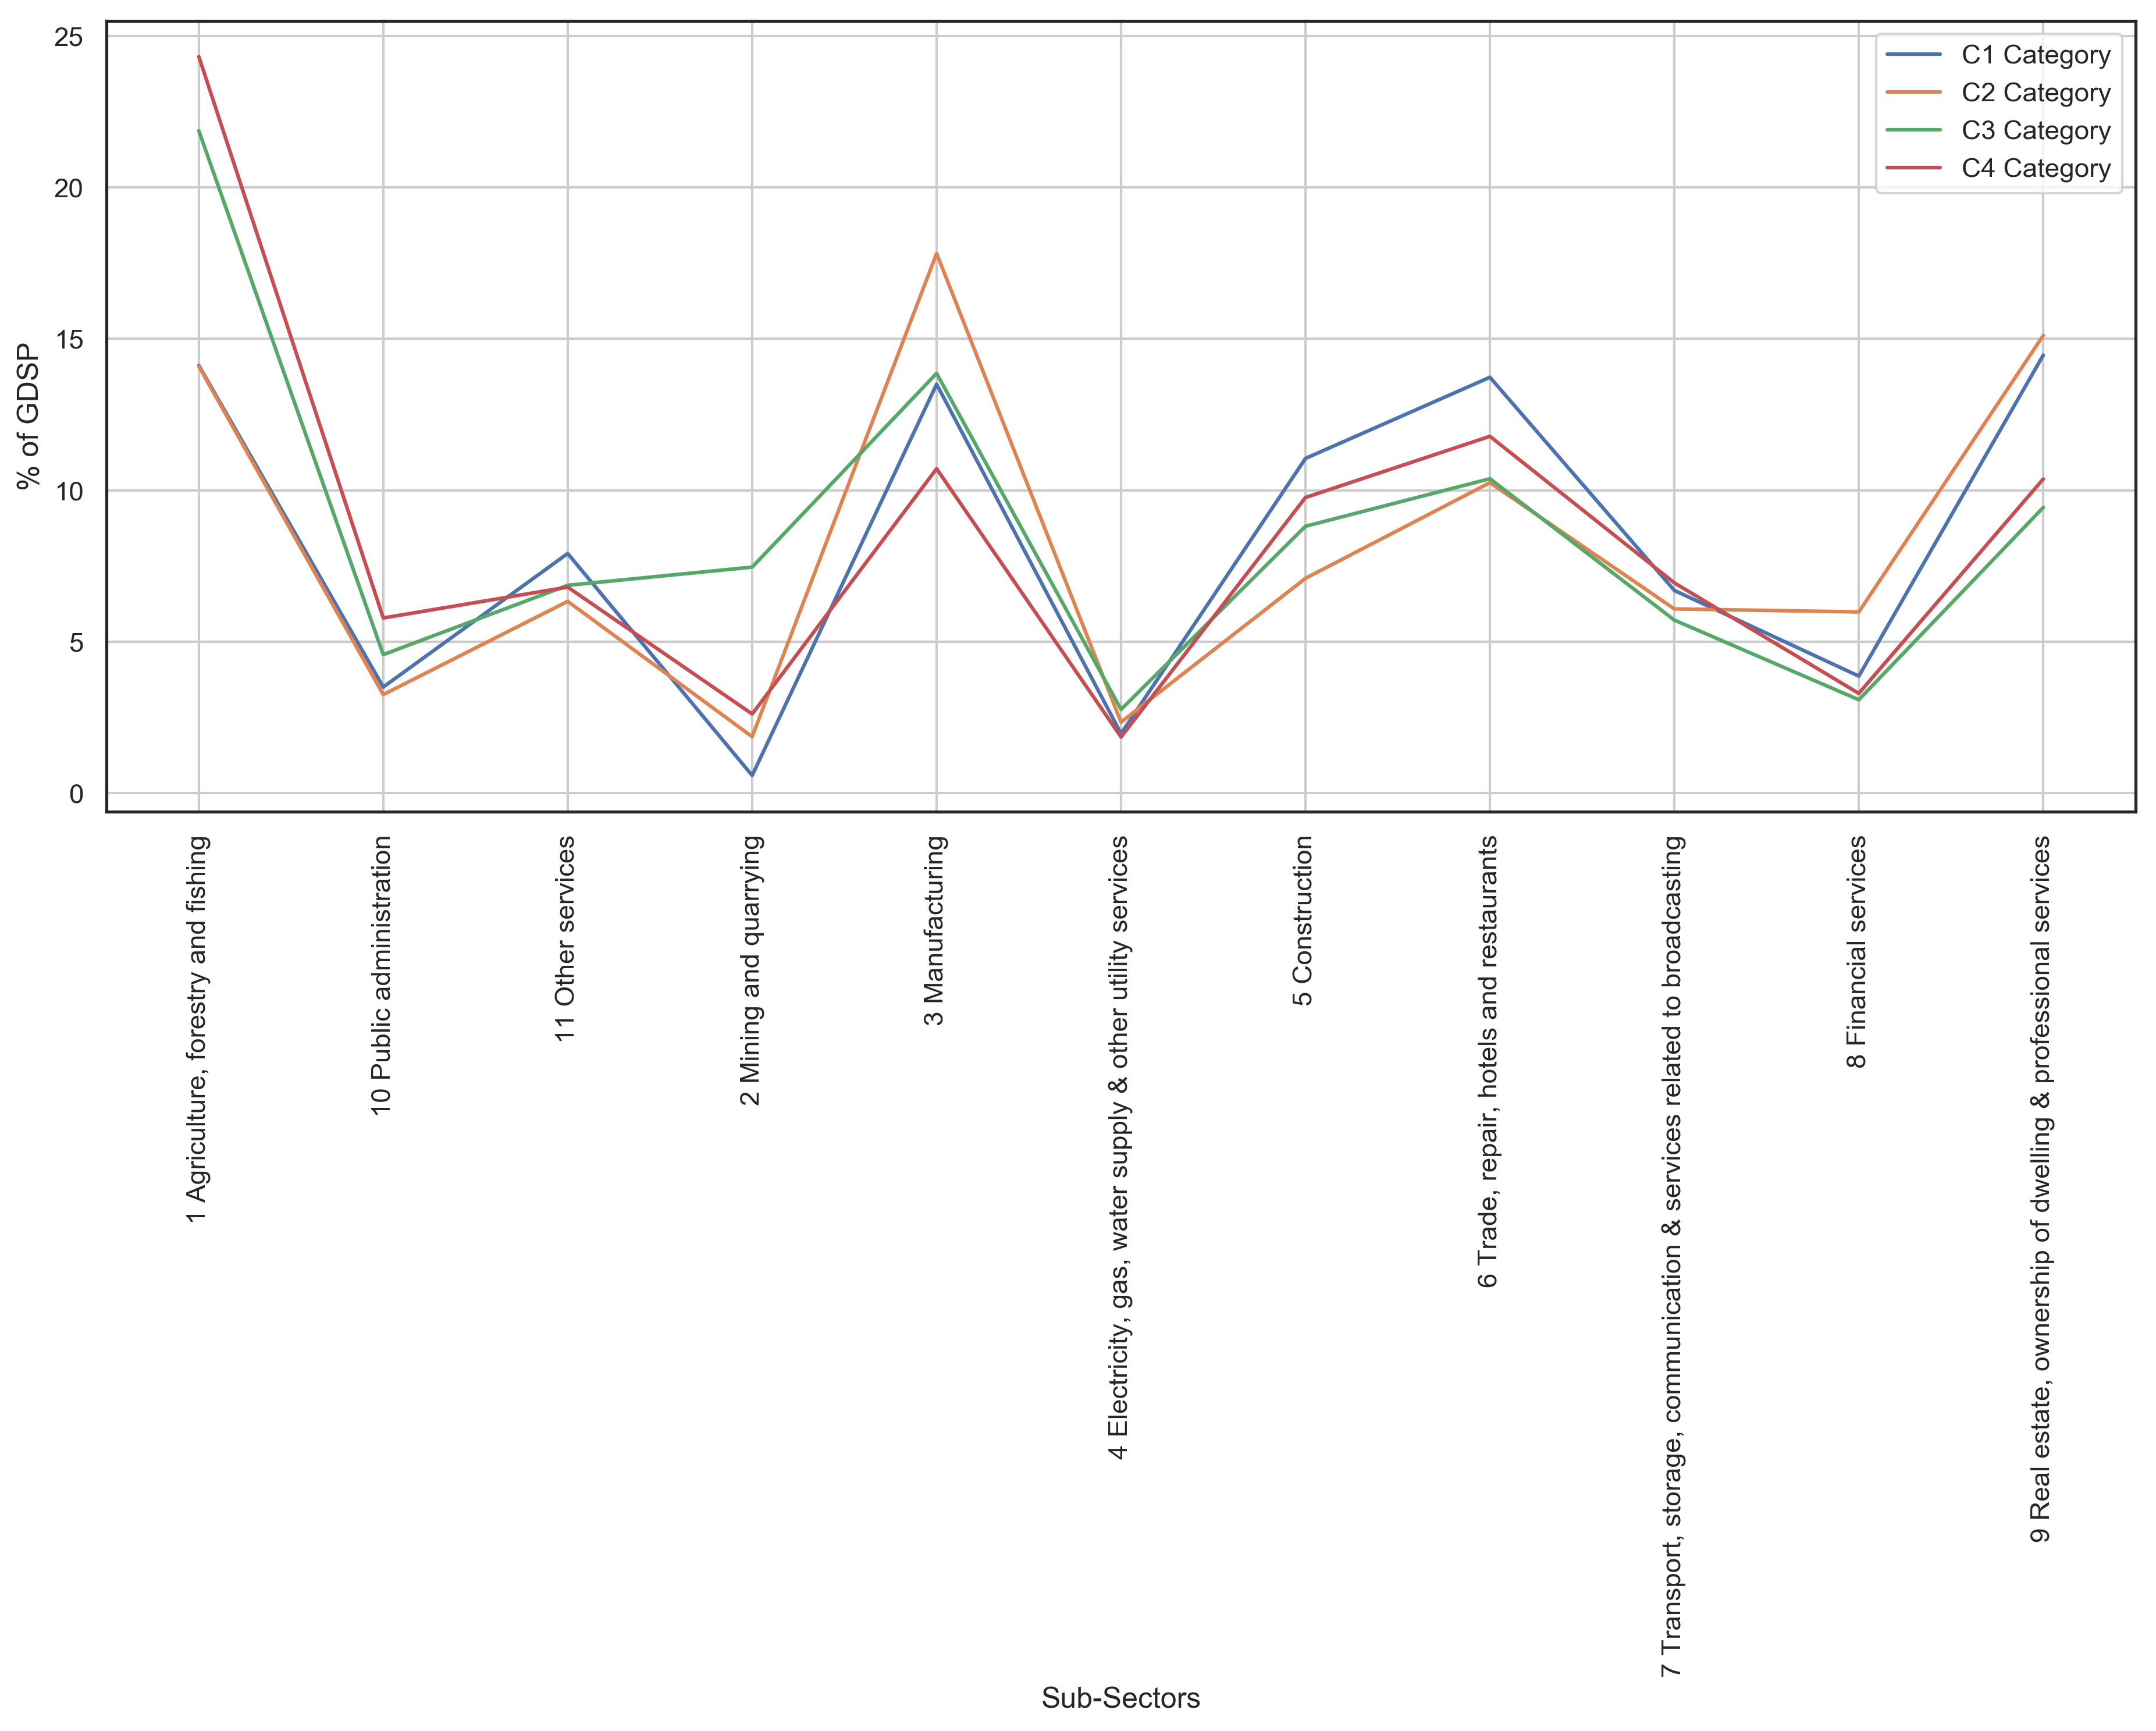

In [91]:
plt.figure(figsize=(15,6), dpi=300)
sns.lineplot(x=category_summary.index,y=category_summary['C1'], label = 'C1 Category')
sns.lineplot(x=category_summary.index,y=category_summary['C2'], label = 'C2 Category')
sns.lineplot(x=category_summary.index,y=category_summary['C3'], label = 'C3 Category')
sns.lineplot(x=category_summary.index,y=category_summary['C4'], label = 'C4 Category')
plt.xticks(rotation=90)
plt.xlabel('Sub-Sectors')
plt.ylabel('% of GDSP')
plt.grid()
plt.show()

Now that you have summarised the data in the form of plots, tables etc., try to observe non-obvious insights from it. Think about questions such as: <br>

1. Does the GDP distribution of the top states (C1) differ from the others? <br>
**Answer :** As we can see from the above plot, pattern is same for all the categories so we can conclude that the GDP distribution of the top states (C1) does not differ from the others category states.
 

In [92]:
data = all_state[['1 Agriculture, forestry and fishing','2 Mining and quarrying','3 Manufacturing',
                 '4 Electricity, gas, water supply & other utility services','5 Construction',
                  '6 Trade, repair, hotels and restaurants','7 Transport, storage, communication & services related to broadcasting',
                  '8 Financial services','9 Real estate, ownership of dwelling & professional services',
                  '10 Public administration', '11 Other services','15 Gross State Domestic Product']]

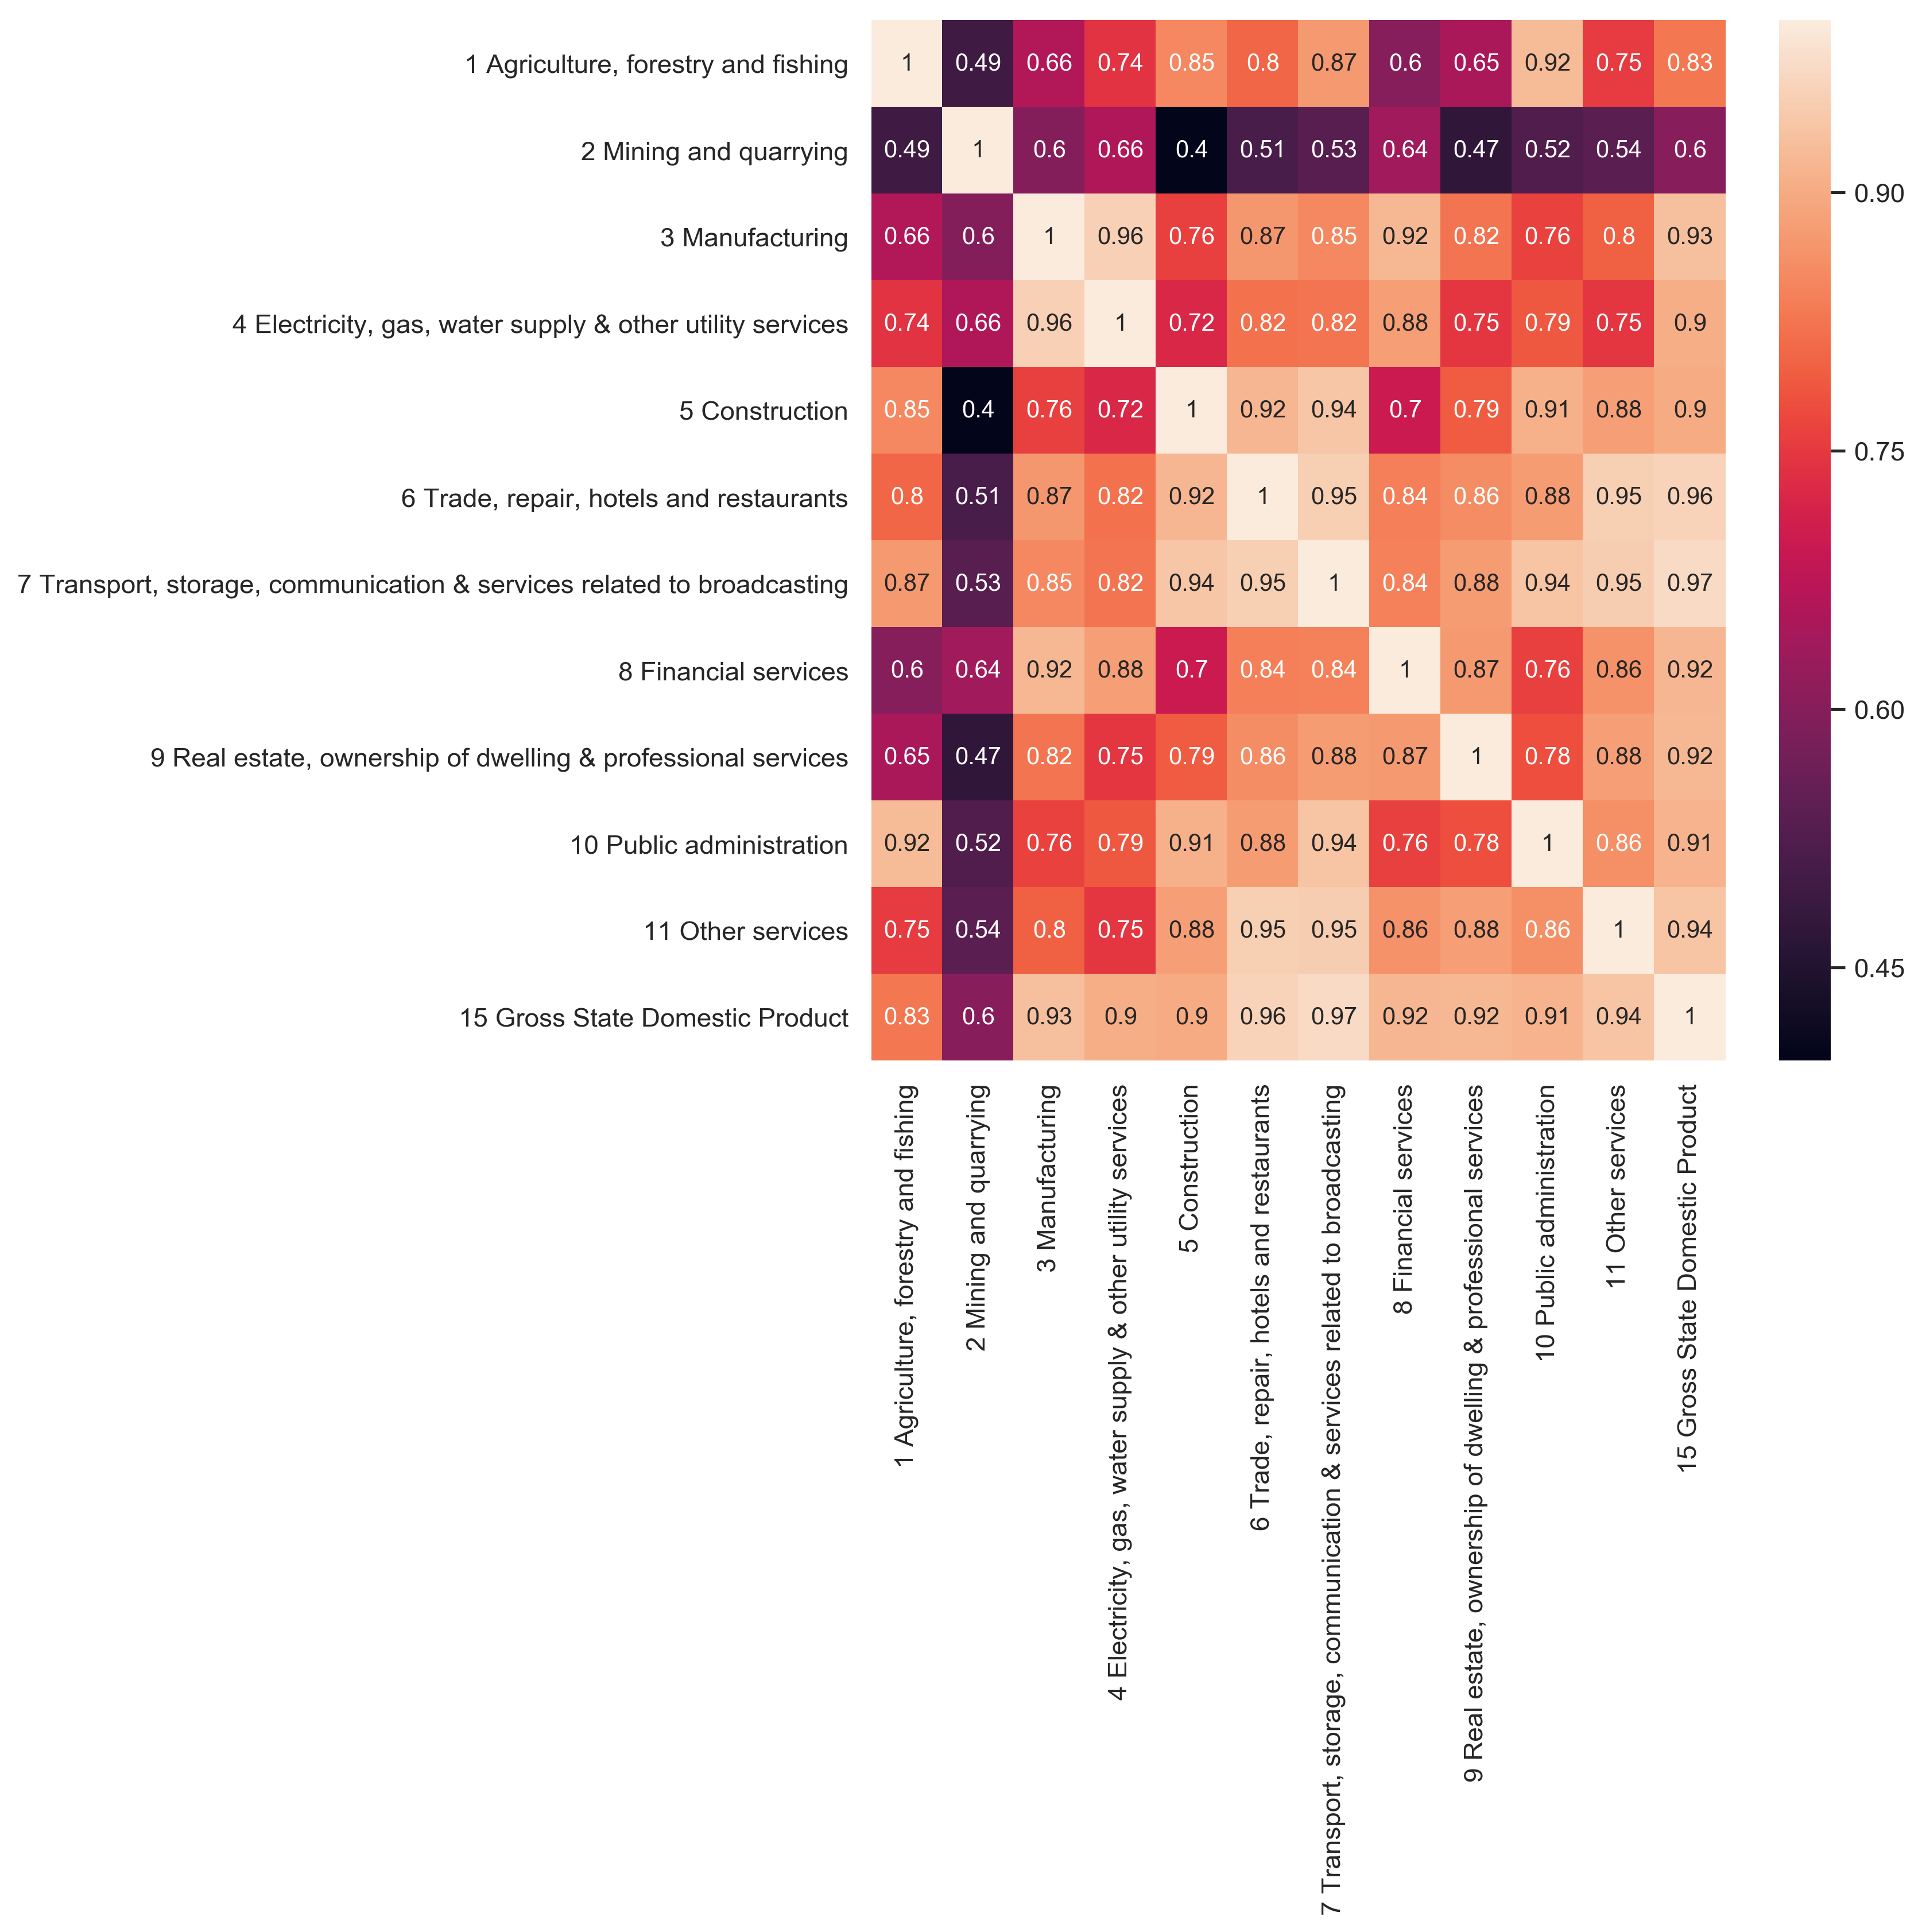

In [93]:
plt.figure(figsize=(8,8), dpi=300)
sns.heatmap(data.corr(), annot=True)

2. Which sub-sectors seem to be correlated with high GDP? <br>
**Answer:** As we can see from above heatmap the below sub-sectors are highly correlated to high GDP:<br>
A. Manufacturing<br>
B. Trade, repair, hotels and restaurants<br>
C. Transport, storage, communication & services related to broadcasting<br>
D. Financial services<br>
E. Real estate, ownership of dwelling & professional services <br>

3. Which sub-sectors do the various categories need to focus on?<br>
**Answer:** The below sub-sectors contributes to nearly <=5% of GDSP. <br>
A. Financial services <br>
B. Public administration <br>
C. Electricity, gas, water supply & other utility services <br>
D. Mining and quarrying

### Task 5 <br>
Finally, provide at least two recommendations for each category to improve the per capita GDP.

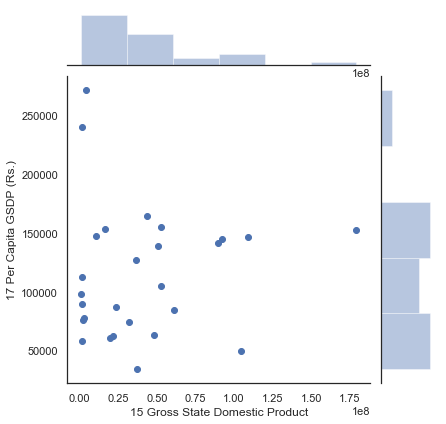

In [94]:
sns.jointplot(y=all_state['17 Per Capita GSDP (Rs.)'], x=all_state['15 Gross State Domestic Product'])
plt.show()

As we can see from the above plot, Per Capita GSDP almost proportional to GDSP

## Recommendations<br>
**Recommendation for C1 Category States**<br> 
States under C1 category: Goa, Sikkim, Haryana and Kerela <br>

1. Financial services
2. Electricity, gas, water supply & other utility services

**Recommendation for C2 Category States**<br>
States Under C2 Category: Uttarakhand, Maharashtra, Himachal_pradesh, Tamil_Nadu, Karnataka, Gujrat, Telangna, Punjab, Arunachal_Pradesh and Andhra_Pradesh <br>

1. Public administration
2. Electricity, gas, water supply & other utility services

**Recommendation for C3 Category States**<br>
States Under C3 Category: Mizoram, Nagaland, Chattisgarh, Rajasthan, Tripura, Meghalaya and Odisha <br>
**Difficult and Mountaineous Terrain for most of the states** <br>

1. Transport, storage, communication & services related to broadcasting	
2. Financial services
<br>

**Recommendation for C4 Category States**<br>
States Under C4 Category: Madhya Pradesh, Jharkhand, Assam, Manipur, Uttar_Pradesh and Bihar <br>

1. Electricity, gas, water supply & other utility services
2. Mining and quarrying

# Part-II: GDP and Education Drop-out Rates

In [95]:
#loading the dataset
data_II = pd.read_csv('Data-II.csv')

In [96]:
data_II.head()

Sl. No. Level of Education - State  Primary - 2012-2013  \
0       1              A & N Islands                 0.68   
1       2             Andhra Pradesh                 3.18   
2       3          Arunachal Pradesh                15.16   
3       4                      Assam                 6.24   
4       5                      Bihar                  NaN   

   Primary - 2014-2015  Primary - 2014-2015.1  Upper Primary - 2012-2013  \
0                 1.21                   0.51                       1.23   
1                 4.35                   6.72                       3.36   
2                10.89                  10.82                       7.47   
3                 7.44                  15.36                       7.20   
4                 2.09                    NaN                        NaN   

   Upper Primary - 2013-2014  Upper Primary - 2014-2015  \
0                       0.51                       1.69   
1                       3.78                       5.20   
2                       5.59                       6.71   
3                       7.05                      10.51   
4                       2.98                       4.08   

   Secondary - 2012-2013  Secondary - 2013-2014  Secondary - 2014-2015  \
0                   5.56                   7.20                   9.87   
1                  12.72                  12.65                  15.71   
2                  12.93                  14.49                  17.11   
3                  26.77                  30.43                  27.06   
4                  30.14                  25.33                  25.90   

   Senior Secondary - 2012-2013  Senior Secondary - 2013-2014  \
0                         14.14                         15.87   
1                          0.35                         11.79   
2                          5.11                         17.07   
3                          4.69                          7.24   
4                           NaN                           NaN   

   Senior Secondary - 2014-2015  
0                         16.93  
1                           NaN  
2                         18.42  
3                           NaN  
4                           NaN

In [97]:
data_II.columns

Index(['Sl. No.', 'Level of Education - State', 'Primary - 2012-2013',
       'Primary - 2014-2015', 'Primary - 2014-2015.1',
       'Upper Primary - 2012-2013', 'Upper Primary - 2013-2014',
       'Upper Primary - 2014-2015', 'Secondary - 2012-2013',
       'Secondary - 2013-2014', 'Secondary - 2014-2015',
       'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014',
       'Senior Secondary - 2014-2015'],
      dtype='object')

In [98]:
#taking data only for year 2014-15
data_II = data_II[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015',
        'Senior Secondary - 2014-2015']]

In [99]:
data_II = data_II.rename(columns={'Primary - 2014-2015.1':'Primary - 2014-2015'})

In [100]:
data_II.head()

Level of Education - State  Primary - 2014-2015  Upper Primary - 2014-2015  \
0              A & N Islands                 0.51                       1.69   
1             Andhra Pradesh                 6.72                       5.20   
2          Arunachal Pradesh                10.82                       6.71   
3                      Assam                15.36                      10.51   
4                      Bihar                  NaN                       4.08   

   Secondary - 2014-2015  Senior Secondary - 2014-2015  
0                   9.87                         16.93  
1                  15.71                           NaN  
2                  17.11                         18.42  
3                  27.06                           NaN  
4                  25.90                           NaN

In [101]:
#selecting the rows of UTs , West Bengal, Jammu & Kashmir and All India as the Per Capita GDP data is not available 
state_list = ['A & N Islands','Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Jammu and Kashmir','Lakshadweep','Puducherry',
 'West Bengal', 'All India']

In [102]:
data_II.set_index('Level of Education - State', inplace=True)

In [103]:
for state in state_list:
    data_II = data_II.drop(state, axis=0)

In [104]:
data_II.head()

Primary - 2014-2015  Upper Primary - 2014-2015  \
Level of Education - State                                                   
Andhra Pradesh                             6.72                       5.20   
Arunachal Pradesh                         10.82                       6.71   
Assam                                     15.36                      10.51   
Bihar                                       NaN                       4.08   
Chhatisgarh                                2.91                       5.85   

                            Secondary - 2014-2015  \
Level of Education - State                          
Andhra Pradesh                              15.71   
Arunachal Pradesh                           17.11   
Assam                                       27.06   
Bihar                                       25.90   
Chhatisgarh                                 21.26   

                            Senior Secondary - 2014-2015  
Level of Education - State                                
Andhra Pradesh                                       NaN  
Arunachal Pradesh                                  18.42  
Assam                                                NaN  
Bihar                                                NaN  
Chhatisgarh                                         2.76

In [105]:
#checking the missing data
missing_data(data_II)

% of missing value  Count of Missing Values
Senior Secondary - 2014-2015               29.63                        8
Primary - 2014-2015                        11.11                        3
Upper Primary - 2014-2015                   7.41                        2
Secondary - 2014-2015                       0.00                        0

In [106]:
data_II.describe()

Primary - 2014-2015  Upper Primary - 2014-2015  Secondary - 2014-2015  \
count            24.000000                  25.000000              27.000000   
mean              5.126667                   4.504400              17.807407   
std               3.890927                   2.781644               6.845367   
min               0.640000                   0.070000               6.070000   
25%               2.065000                   2.300000              12.595000   
50%               4.530000                   4.080000              15.890000   
75%               7.185000                   6.410000              24.385000   
max              15.360000                  10.510000              29.560000   

       Senior Secondary - 2014-2015  
count                     19.000000  
mean                       5.928947  
std                        4.732449  
min                        0.470000  
25%                        2.430000  
50%                        5.750000  
75%                        7.225000  
max                       18.420000

Ignoring the missing values as the STD is high

In [107]:
#this is added to check if the state for both data_II and all_state is correct, we will remove it afterwards
data_II['State'] = all_state.index

In [108]:
#null values will come if the index of dataframes are not same, so making same index of data_II and all_state dataframe
all_state.index = data_II.index

In [109]:
#adding Per Capita GSDP to data_II
data_II['Per Capita GSDP (Rs.)'] = all_state['17 Per Capita GSDP (Rs.)'].astype(float)

In [110]:
data_II.head()

Primary - 2014-2015  Upper Primary - 2014-2015  \
Level of Education - State                                                   
Andhra Pradesh                             6.72                       5.20   
Arunachal Pradesh                         10.82                       6.71   
Assam                                     15.36                      10.51   
Bihar                                       NaN                       4.08   
Chhatisgarh                                2.91                       5.85   

                            Secondary - 2014-2015  \
Level of Education - State                          
Andhra Pradesh                              15.71   
Arunachal Pradesh                           17.11   
Assam                                       27.06   
Bihar                                       25.90   
Chhatisgarh                                 21.26   

                            Senior Secondary - 2014-2015              State  \
Level of Education - State                                                    
Andhra Pradesh                                       NaN     Andhra_Pradesh   
Arunachal Pradesh                                  18.42  Arunachal_Pradesh   
Assam                                                NaN              Assam   
Bihar                                                NaN              Bihar   
Chhatisgarh                                         2.76        Chattisgarh   

                            Per Capita GSDP (Rs.)  
Level of Education - State                         
Andhra Pradesh                           104977.0  
Arunachal Pradesh                        112718.0  
Assam                                     60621.0  
Bihar                                     33954.0  
Chhatisgarh                               86860.0

In [111]:
#dropping useless state column
data_II = data_II.drop('State', axis=1)

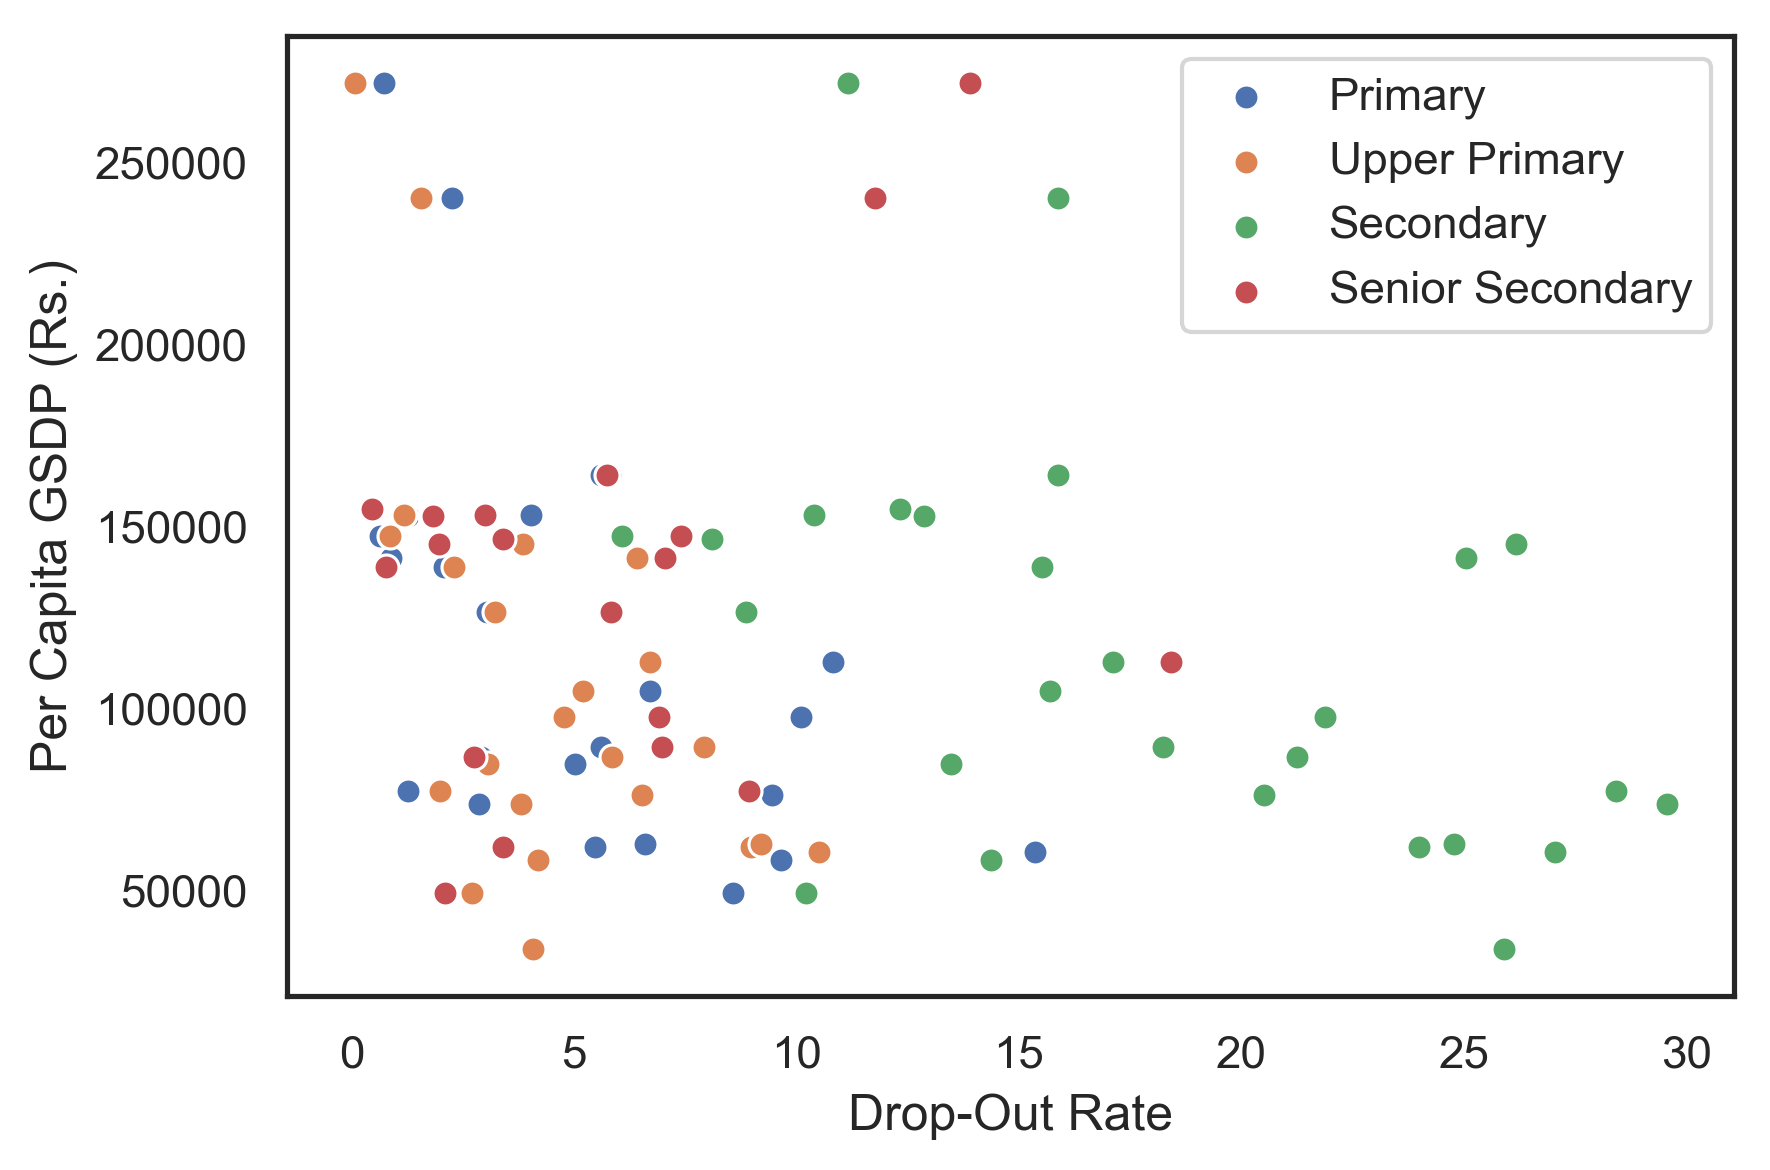

In [112]:

plt.figure(figsize=(6,4),dpi=300)
sns.scatterplot(x=data_II['Primary - 2014-2015'],y=data_II['Per Capita GSDP (Rs.)'], label='Primary')
sns.scatterplot(x=data_II['Upper Primary - 2014-2015'],y=data_II['Per Capita GSDP (Rs.)'], label='Upper Primary')
sns.scatterplot(x=data_II['Secondary - 2014-2015'],y=data_II['Per Capita GSDP (Rs.)'], label='Secondary')
sns.scatterplot(x=data_II['Senior Secondary - 2014-2015'],y=data_II['Per Capita GSDP (Rs.)'], label='Senior Secondary')
plt.xlabel('Drop-Out Rate')
plt.tight_layout()
plt.show()

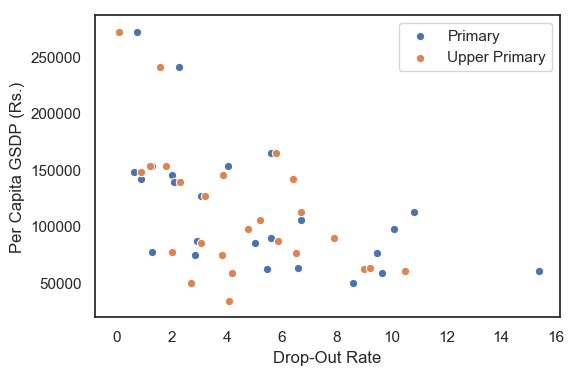

In [113]:
#plotting for primary and upper primary
plt.figure(figsize=(6,4),dpi=100)
sns.scatterplot(x=data_II['Primary - 2014-2015'],y=data_II['Per Capita GSDP (Rs.)'], label='Primary')
sns.scatterplot(x=data_II['Upper Primary - 2014-2015'],y=data_II['Per Capita GSDP (Rs.)'], label='Upper Primary')
plt.xlabel('Drop-Out Rate')
plt.show()

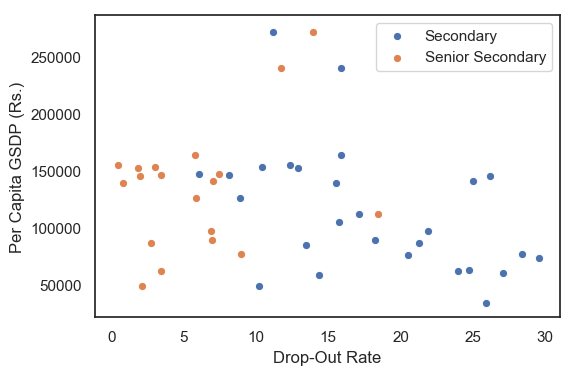

In [114]:
#plotting for secondary and senior secondary
plt.figure(figsize=(6,4),dpi=100)
sns.scatterplot(x=data_II['Secondary - 2014-2015'],y=data_II['Per Capita GSDP (Rs.)'], label='Secondary')
sns.scatterplot(x=data_II['Senior Secondary - 2014-2015'],y=data_II['Per Capita GSDP (Rs.)'], label='Senior Secondary')
plt.xlabel('Drop-Out Rate')
plt.show()

**Write the key insights you observe from this data:**<br>
Form at least one reasonable hypothesis for the observations from the data

1. As you can see the graph of Primary and Upper Primary it is clear that when the drop out rate is increasing the Per Capita GDSP is decreasing. So Drop Out rate is inversely proportional to the Per Capita GDSP.
2. From the graph of Secondary and Senior Secondary , for most of the states when the drop out rate is increasing the Per Capita GDSP is also decreasing.But we have some outliers in this case , that may be due to some special features in that state where Higher Education is not contributing to Per Capita GDSP